In [1662]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans 
from sklearn.neighbors import NearestNeighbors
from scipy.stats import zscore 
from sklearn.metrics import silhouette_score 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

## DATA PREPROCESSING

In [1663]:
df3 =pd.read_csv('BigBash_Bat.csv')
df3.head()

PLAYER             TEAM  INNINGS  NOT OUT   RUNS   HS  \
0      Alex Hales   Sydney Thunder     15.0      1.0  537.0  110   
1     James Vince    Sydney Sixers     16.0      2.0  536.0  98*   
2  Josh Phillippe    Sydney Sixers     16.0      0.0  504.0   95   
3      Chris Lynn    Brisbane Heat     13.0      0.0  456.0   69   
4     Colin Munro  Perth Scorchers     15.0      1.0  443.0   82   

           AVERAGE  BALL FACED  STRIKE RATE  100'S  50'S   4'S   6'S  
0  38.357142857143       336.0   159.821429    1.0   3.0  54.0  30.0  
1  38.285714285714       374.0   143.315508    0.0   4.0  59.0  11.0  
2             31.5       340.0   148.235294    0.0   3.0  55.0  14.0  
3  35.076923076923       296.0   154.054054    0.0   5.0  39.0  26.0  
4  31.642857142857       346.0   128.034682    0.0   4.0  32.0  19.0

In [1664]:
df4 = pd.read_csv('Bigbash_Bowl.csv')
df4.head()

PLAYER               TEAM  INNINGS  OVERS  OVERS*  RUNS  WICKETS  \
0  Jhye Richardson    Perth Scorchers       17   61.3  61.500   463       29   
1    Ben Dwarshuis      Sydney Sixers       13   45.3  45.500   403       24   
2    Mark Steketee      Brisbane Heat       16   56.2  56.333   522       24   
3         Wes Agar  Adelaide Strikers       15   54.4  54.667   457       22   
4   Tanveer Sangha     Sydney Thunder       15   47.3  47.500   394       21   

    BBI          AVERAGE      ECON               SR  4W  5W  
0  4\24  15.965517241379  7.528455  12.724137931034   2   0  
1  4\13  16.791666666667  8.857143           11.375   1   0  
2  4\33            21.75  9.266327         14.08325   1   0  
3  4\27  20.772727272727  8.359705  14.909181818182   1   0  
4  4\14  18.761904761905  8.294737  13.571428571429   1   0

In [1665]:
print("Batting Data Info:")
df3.info()
print("\nDuplicated rows in Batting Data:", df3[df3.duplicated()].shape[0])

Batting Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PLAYER       138 non-null    object 
 1   TEAM         138 non-null    object 
 2   INNINGS      138 non-null    float64
 3   NOT OUT      138 non-null    float64
 4   RUNS         138 non-null    float64
 5   HS           138 non-null    object 
 6   AVERAGE      138 non-null    object 
 7   BALL FACED   138 non-null    float64
 8   STRIKE RATE  138 non-null    float64
 9   100'S        138 non-null    float64
 10  50'S         138 non-null    float64
 11  4'S          138 non-null    float64
 12  6'S          138 non-null    float64
dtypes: float64(9), object(4)
memory usage: 15.4+ KB

Duplicated rows in Batting Data: 11


In [1666]:
print("Bowling Data Info:")
df4.info()
print("\nDuplicated rows in Bowling Data:", df4[df4.duplicated()].shape[0])

Bowling Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PLAYER   102 non-null    object 
 1   TEAM     102 non-null    object 
 2   INNINGS  102 non-null    int64  
 3   OVERS    102 non-null    float64
 4   OVERS*   102 non-null    float64
 5   RUNS     102 non-null    int64  
 6   WICKETS  102 non-null    int64  
 7   BBI      102 non-null    object 
 8   AVERAGE  102 non-null    object 
 9   ECON     102 non-null    float64
 10  SR       102 non-null    object 
 11  4W       102 non-null    int64  
 12  5W       102 non-null    int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 10.5+ KB

Duplicated rows in Bowling Data: 0


In [1667]:
df3.shape
print(f"The batting dataset has {df3.shape[0]} rows, and {df3.shape[1]} columns.")

The batting dataset has 150 rows, and 13 columns.


In [1668]:
df4.shape
print(f"The bowling dataset has {df4.shape[0]} rows, and {df4.shape[1]} columns.")

The bowling dataset has 102 rows, and 13 columns.


In [1669]:
df3 = df3.reset_index(drop=True)

In [1670]:
df3.isna().sum()

PLAYER         12
TEAM           12
INNINGS        12
NOT OUT        12
RUNS           12
HS             12
AVERAGE        12
BALL FACED     12
STRIKE RATE    12
100'S          12
50'S           12
4'S            12
6'S            12
dtype: int64

In [1671]:
df3=df3.dropna(axis=0)

In [1672]:
df4.isna().sum()

PLAYER     0
TEAM       0
INNINGS    0
OVERS      0
OVERS*     0
RUNS       0
WICKETS    0
BBI        0
AVERAGE    0
ECON       0
SR         0
4W         0
5W         0
dtype: int64

In [1673]:
df3.describe().T

count        mean         std  min    25%         50%  \
INNINGS      138.0    6.985507    4.882541  1.0    3.0    6.000000   
NOT OUT      138.0    1.442029    1.674271  0.0    0.0    1.000000   
RUNS         138.0  129.710145  144.961822  0.0   12.0   61.500000   
BALL FACED   138.0   98.731884  105.540426  1.0   12.0   51.000000   
STRIKE RATE  138.0  112.931502   41.343768  0.0  100.0  123.038462   
100'S        138.0    0.014493    0.119946  0.0    0.0    0.000000   
50'S         138.0    0.608696    1.097008  0.0    0.0    0.000000   
4'S          138.0   11.362319   14.004661  0.0    1.0    4.000000   
6'S          138.0    4.637681    6.154865  0.0    0.0    2.000000   

                    75%         max  
INNINGS       12.000000   16.000000  
NOT OUT        2.000000    9.000000  
RUNS         219.250000  537.000000  
BALL FACED   164.000000  374.000000  
STRIKE RATE  137.937063  205.714286  
100'S          0.000000    1.000000  
50'S           1.000000    5.000000  
4'S           19.000000   59.000000  
6'S            7.000000   30.000000

In [1674]:
df4.describe().T

count        mean         std       min        25%         50%  \
INNINGS  102.0    7.176471    4.960062  1.000000   3.000000    6.000000   
OVERS    102.0   22.239216   17.933183  0.100000   6.000000   17.700000   
OVERS*   102.0   22.299931   17.968450  0.166000   6.000000   17.833500   
RUNS     102.0  180.784314  142.285282  1.000000  55.750000  147.500000   
WICKETS  102.0    7.107843    7.009056  0.000000   1.000000    5.000000   
ECON     102.0    8.845983    2.651779  3.003003   7.472986    8.277778   
4W       102.0    0.127451    0.363470  0.000000   0.000000    0.000000   
5W       102.0    0.039216    0.195066  0.000000   0.000000    0.000000   

               75%         max  
INNINGS   12.00000   17.000000  
OVERS     38.87500   61.300000  
OVERS*    38.95825   61.500000  
RUNS     311.00000  522.000000  
WICKETS   11.75000   29.000000  
ECON       9.35119   24.096386  
4W         0.00000    2.000000  
5W         0.00000    1.000000

### LABEL ENCODING

In [1675]:
label=LabelEncoder()
df3['TEAM']=label.fit_transform(df3['TEAM'])
df3.head()

PLAYER  TEAM  INNINGS  NOT OUT   RUNS   HS          AVERAGE  \
0      Alex Hales     7     15.0      1.0  537.0  110  38.357142857143   
1     James Vince     6     16.0      2.0  536.0  98*  38.285714285714   
2  Josh Phillippe     6     16.0      0.0  504.0   95             31.5   
3      Chris Lynn     1     13.0      0.0  456.0   69  35.076923076923   
4     Colin Munro     5     15.0      1.0  443.0   82  31.642857142857   

   BALL FACED  STRIKE RATE  100'S  50'S   4'S   6'S  
0       336.0   159.821429    1.0   3.0  54.0  30.0  
1       374.0   143.315508    0.0   4.0  59.0  11.0  
2       340.0   148.235294    0.0   3.0  55.0  14.0  
3       296.0   154.054054    0.0   5.0  39.0  26.0  
4       346.0   128.034682    0.0   4.0  32.0  19.0

In [1676]:
df4['TEAM']=label.fit_transform(df4['TEAM'])
df4.head()

PLAYER  TEAM  INNINGS  OVERS  OVERS*  RUNS  WICKETS   BBI  \
0  Jhye Richardson     5       17   61.3  61.500   463       29  4\24   
1    Ben Dwarshuis     6       13   45.3  45.500   403       24  4\13   
2    Mark Steketee     1       16   56.2  56.333   522       24  4\33   
3         Wes Agar     0       15   54.4  54.667   457       22  4\27   
4   Tanveer Sangha     7       15   47.3  47.500   394       21  4\14   

           AVERAGE      ECON               SR  4W  5W  
0  15.965517241379  7.528455  12.724137931034   2   0  
1  16.791666666667  8.857143           11.375   1   0  
2            21.75  9.266327         14.08325   1   0  
3  20.772727272727  8.359705  14.909181818182   1   0  
4  18.761904761905  8.294737  13.571428571429   1   0

In [1677]:
df4.head()

PLAYER  TEAM  INNINGS  OVERS  OVERS*  RUNS  WICKETS   BBI  \
0  Jhye Richardson     5       17   61.3  61.500   463       29  4\24   
1    Ben Dwarshuis     6       13   45.3  45.500   403       24  4\13   
2    Mark Steketee     1       16   56.2  56.333   522       24  4\33   
3         Wes Agar     0       15   54.4  54.667   457       22  4\27   
4   Tanveer Sangha     7       15   47.3  47.500   394       21  4\14   

           AVERAGE      ECON               SR  4W  5W  
0  15.965517241379  7.528455  12.724137931034   2   0  
1  16.791666666667  8.857143           11.375   1   0  
2            21.75  9.266327         14.08325   1   0  
3  20.772727272727  8.359705  14.909181818182   1   0  
4  18.761904761905  8.294737  13.571428571429   1   0

In [1678]:
df4['AVERAGE'] = df4['AVERAGE'].astype(str)
mask = df4['AVERAGE'] == '#DIV/0!'
# print(mask)
for index, row in df4.loc[mask].iterrows():
    wkt = row['WICKETS']
    if wkt != 0:
        df4.at[index, 'AVERAGE'] = row['RUNS'] / wkt
    else:
        df4.at[index, 'AVERAGE'] = row['RUNS']

df4['AVERAGE'] = df4['AVERAGE'].astype(float)   


In [1679]:
df4['SR'] = df4['SR'].astype(str)
mask = df4['SR'] == '#DIV/0!'
for index, row in df4.loc[mask].iterrows():
        df4.at[index, 'SR'] = row['RUNS']

df4['SR'] = df4['SR'].astype(float)   


In [1680]:
df4.tail()

PLAYER  TEAM  INNINGS  OVERS  OVERS*  RUNS  WICKETS   BBI  \
97   Andre Fletcher     4        1    1.0     1.0     8        0   0\8   
98    Tom O Connell     4        1    1.0     1.0    15        0  0\15   
99     Lance Morris     4        2    3.0     3.0    37        0  0\14   
100   Ashton Turner     5        5    5.3     5.5    54        0   0\8   
101      Joel Paris     5        1    1.0     1.0    10        0  0\10   

     AVERAGE       ECON    SR  4W  5W  
97       8.0   8.000000   8.0   0   0  
98      15.0  15.000000  15.0   0   0  
99      37.0  12.333333  37.0   0   0  
100     54.0   9.818182  54.0   0   0  
101     10.0  10.000000  10.0   0   0

## BATTING DATA

Text(0.5, 1.0, 'Top 10 Players by Runs')

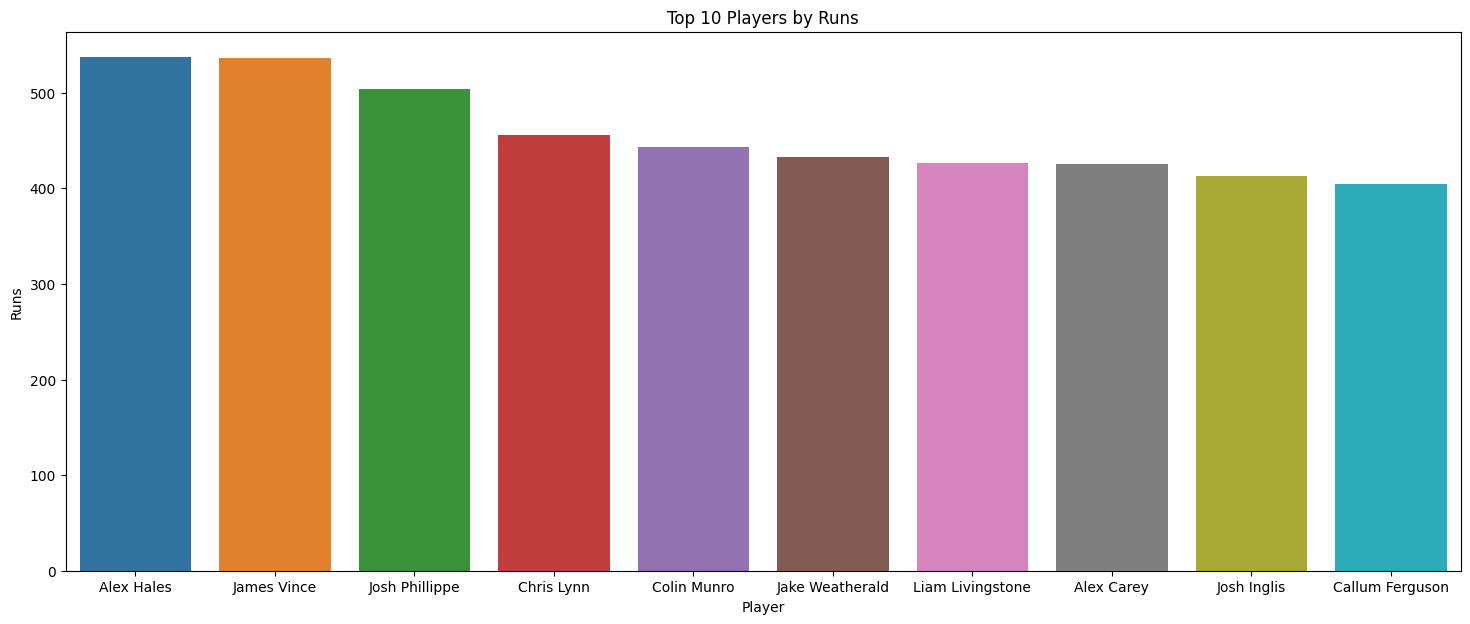

In [1681]:
plt.figure(figsize=(18,7))
b1=df3.groupby('PLAYER')['RUNS'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Player' ,'Runs']
sns.barplot(data= b1 , x= 'Player' , y ='Runs')
plt.title("Top 10 Players by Runs")

Text(0.5, 1.0, 'Top 10 players by Strike Rate')

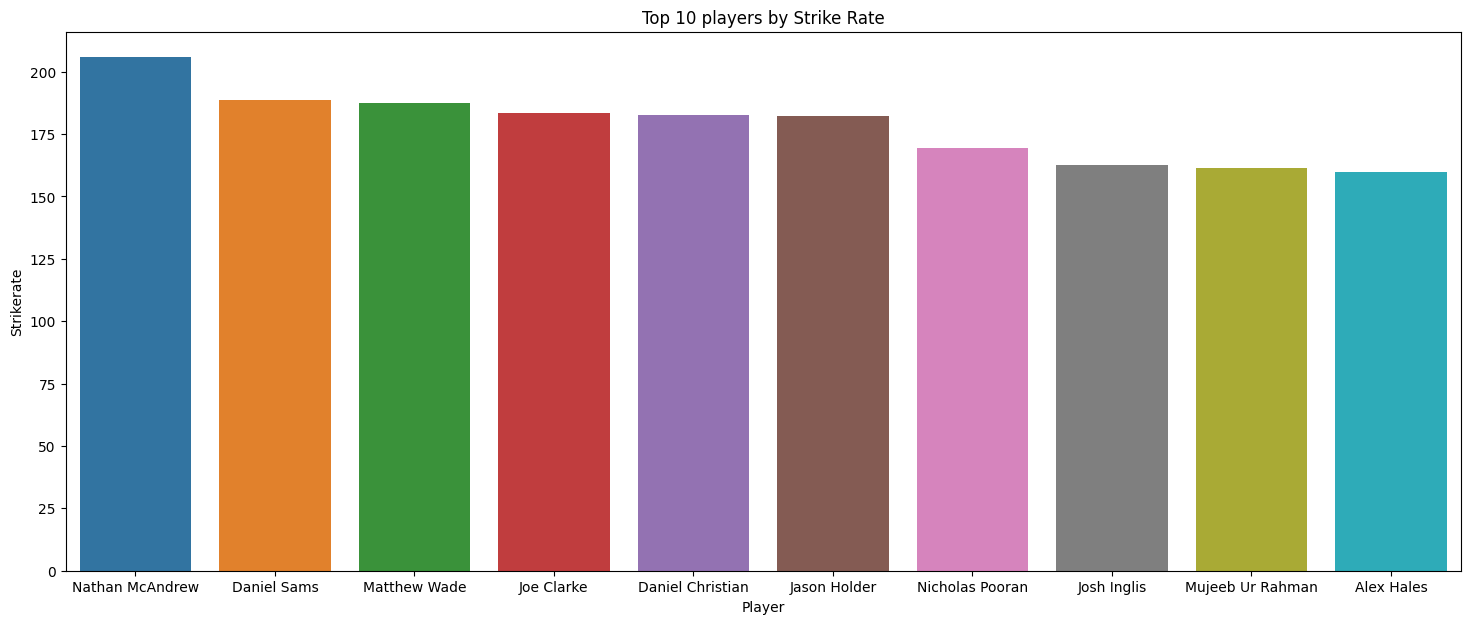

In [1682]:
plt.figure(figsize=(18,7))
b1=df3.groupby('PLAYER')['STRIKE RATE'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Player' ,'Strikerate']
sns.barplot(data= b1 , x= 'Player' , y ='Strikerate')
plt.title("Top 10 players by Strike Rate")

Text(0.5, 1.0, 'Top 10 players by Fours')

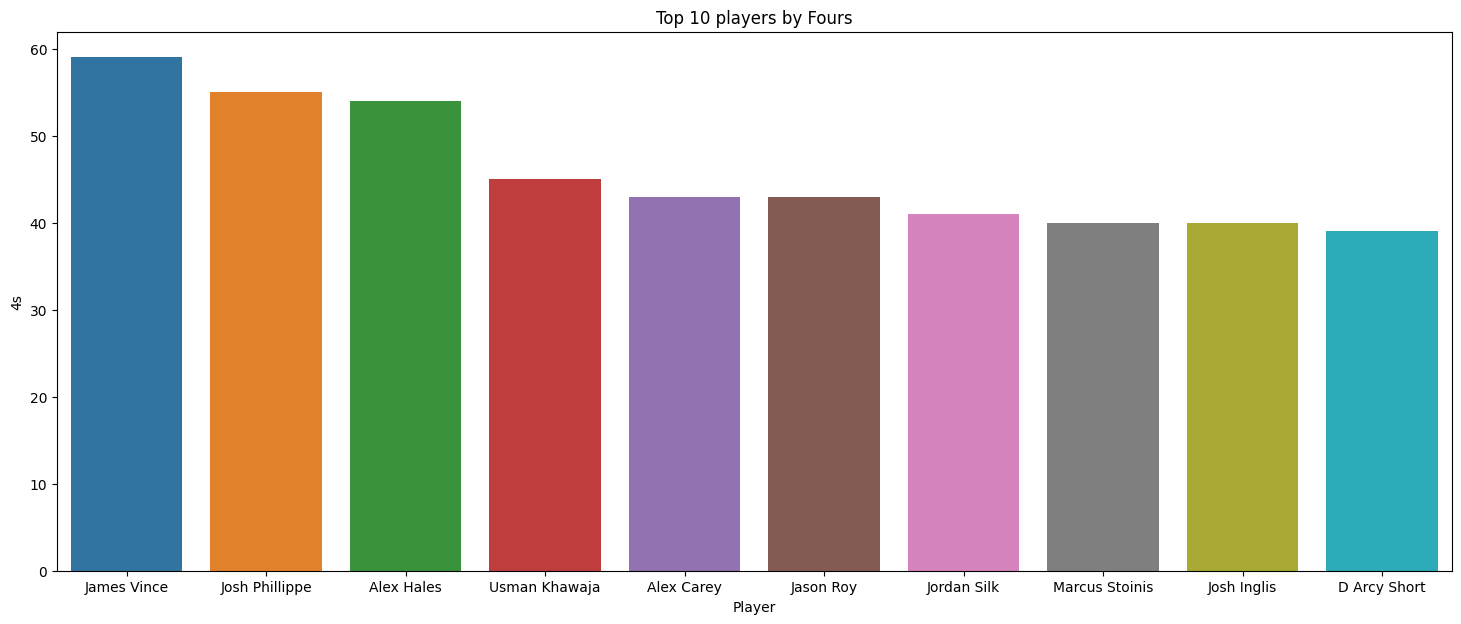

In [1683]:
plt.figure(figsize=(18,7))
b1=df3.groupby('PLAYER')["4'S"].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Player' ,'4s']
sns.barplot(data= b1 , x= 'Player' , y ='4s')
plt.title("Top 10 players by Fours")

Text(0.5, 1.0, 'Top 10 players by Sixes')

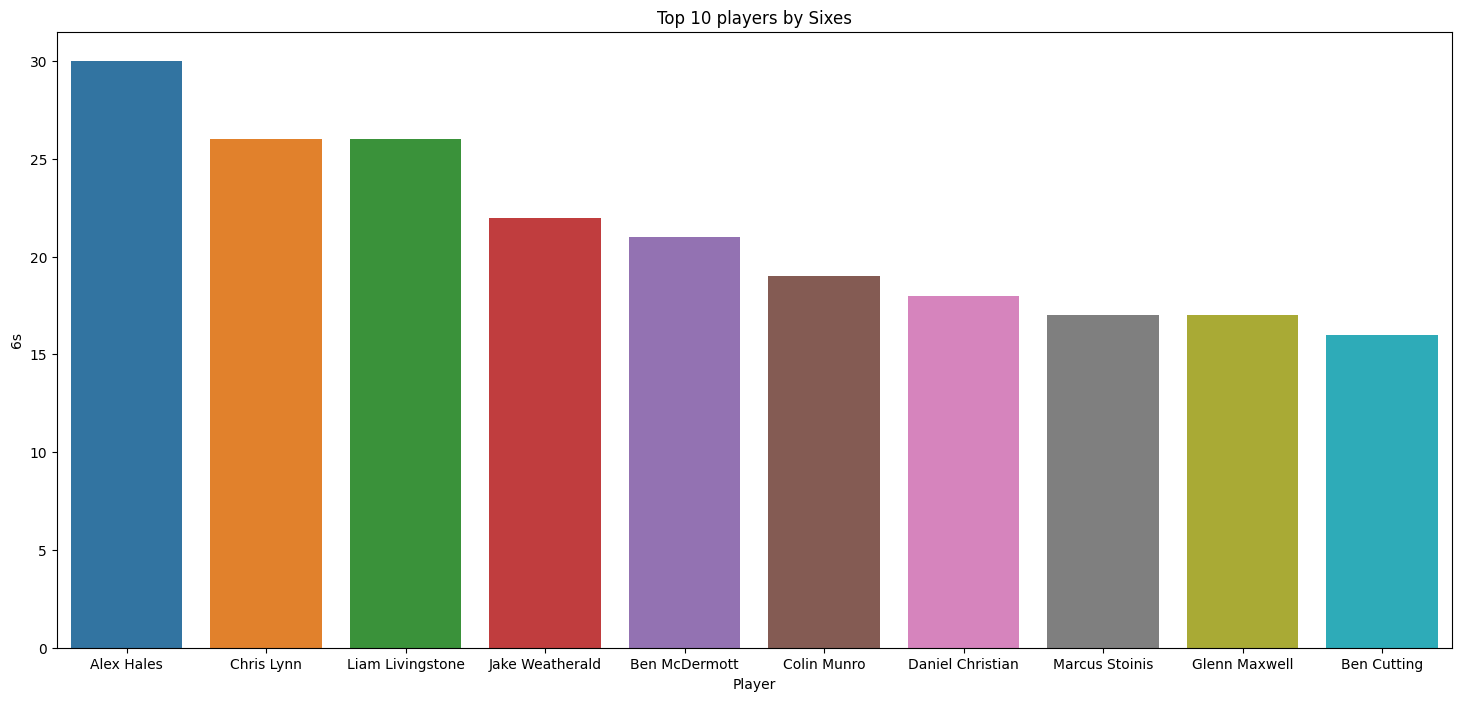

In [1684]:
plt.figure(figsize=(18,8))
b1=df3.groupby('PLAYER')["6'S"].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Player' ,'6s']
sns.barplot(data= b1 , x= 'Player' , y ='6s')
plt.title("Top 10 players by Sixes")

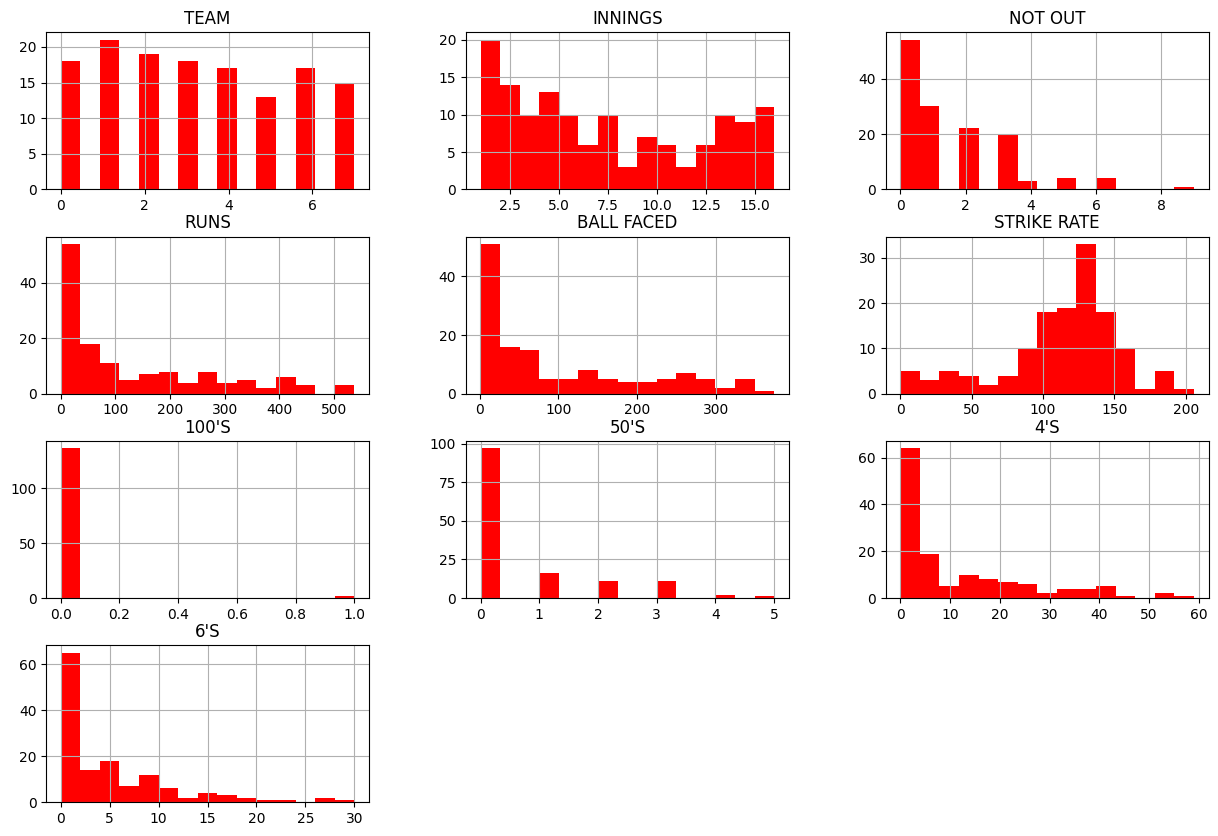

In [1685]:
df3.hist(bins = 15, figsize = (15, 10), color = 'r')
plt.show()

In [1686]:
df3.head()

PLAYER  TEAM  INNINGS  NOT OUT   RUNS   HS          AVERAGE  \
0      Alex Hales     7     15.0      1.0  537.0  110  38.357142857143   
1     James Vince     6     16.0      2.0  536.0  98*  38.285714285714   
2  Josh Phillippe     6     16.0      0.0  504.0   95             31.5   
3      Chris Lynn     1     13.0      0.0  456.0   69  35.076923076923   
4     Colin Munro     5     15.0      1.0  443.0   82  31.642857142857   

   BALL FACED  STRIKE RATE  100'S  50'S   4'S   6'S  
0       336.0   159.821429    1.0   3.0  54.0  30.0  
1       374.0   143.315508    0.0   4.0  59.0  11.0  
2       340.0   148.235294    0.0   3.0  55.0  14.0  
3       296.0   154.054054    0.0   5.0  39.0  26.0  
4       346.0   128.034682    0.0   4.0  32.0  19.0

In [1687]:
df3['HS'] = df3['HS'].str.replace('*', '').astype(int)
df3.head()

PLAYER  TEAM  INNINGS  NOT OUT   RUNS   HS          AVERAGE  \
0      Alex Hales     7     15.0      1.0  537.0  110  38.357142857143   
1     James Vince     6     16.0      2.0  536.0   98  38.285714285714   
2  Josh Phillippe     6     16.0      0.0  504.0   95             31.5   
3      Chris Lynn     1     13.0      0.0  456.0   69  35.076923076923   
4     Colin Munro     5     15.0      1.0  443.0   82  31.642857142857   

   BALL FACED  STRIKE RATE  100'S  50'S   4'S   6'S  
0       336.0   159.821429    1.0   3.0  54.0  30.0  
1       374.0   143.315508    0.0   4.0  59.0  11.0  
2       340.0   148.235294    0.0   3.0  55.0  14.0  
3       296.0   154.054054    0.0   5.0  39.0  26.0  
4       346.0   128.034682    0.0   4.0  32.0  19.0

In [1688]:
df3['AVERAGE'] = df3['AVERAGE'].astype(str)
mask = df3['AVERAGE'] == '#DIV/0!'
# print(mask)
for index, row in df3.loc[mask].iterrows():
    inns_minus_no = row['INNINGS'] - row['NOT OUT']
    if inns_minus_no != 0:
        df3.at[index, 'AVERAGE'] = row['RUNS'] / inns_minus_no
    else:
        df3.at[index, 'AVERAGE'] = row['RUNS']

df3['AVERAGE'] = df3['RUNS'].astype(float)   


In [1689]:
df3['AVERAGE'] = df3['AVERAGE'].round(2)

In [1690]:
df3['STRIKE RATE'] = df3['STRIKE RATE'].round(2)

In [1691]:
df3.head()

PLAYER  TEAM  INNINGS  NOT OUT   RUNS   HS  AVERAGE  BALL FACED  \
0      Alex Hales     7     15.0      1.0  537.0  110    537.0       336.0   
1     James Vince     6     16.0      2.0  536.0   98    536.0       374.0   
2  Josh Phillippe     6     16.0      0.0  504.0   95    504.0       340.0   
3      Chris Lynn     1     13.0      0.0  456.0   69    456.0       296.0   
4     Colin Munro     5     15.0      1.0  443.0   82    443.0       346.0   

   STRIKE RATE  100'S  50'S   4'S   6'S  
0       159.82    1.0   3.0  54.0  30.0  
1       143.32    0.0   4.0  59.0  11.0  
2       148.24    0.0   3.0  55.0  14.0  
3       154.05    0.0   5.0  39.0  26.0  
4       128.03    0.0   4.0  32.0  19.0

[Text(0.5, 1.0, 'Distribution of Balls faced')]

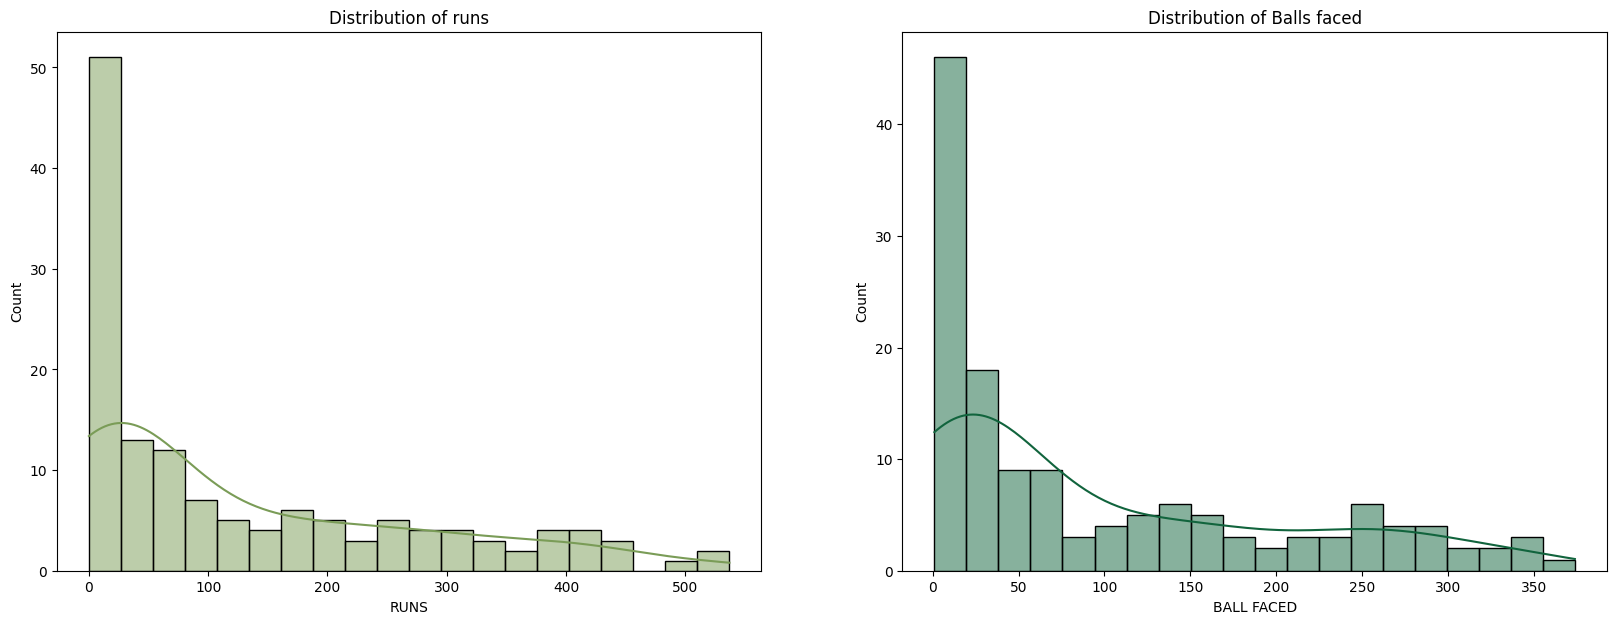

In [1692]:
fig, axes = plt.subplots(1,2, figsize=(20, 7))

sns.histplot(ax = axes[0], x = df3["RUNS"],
             bins = 20,    
             kde = True,
             cbar = True,
             color = "#7A9C57").set(title = "Distribution of runs")

sns.histplot(ax = axes[1], x = df3["BALL FACED"],
             bins = 20,
             kde = True,
             cbar = True,
             color = "#11643D").set(title = "Distribution of Balls faced")


[Text(0.5, 1.0, 'Distribution of sixes')]

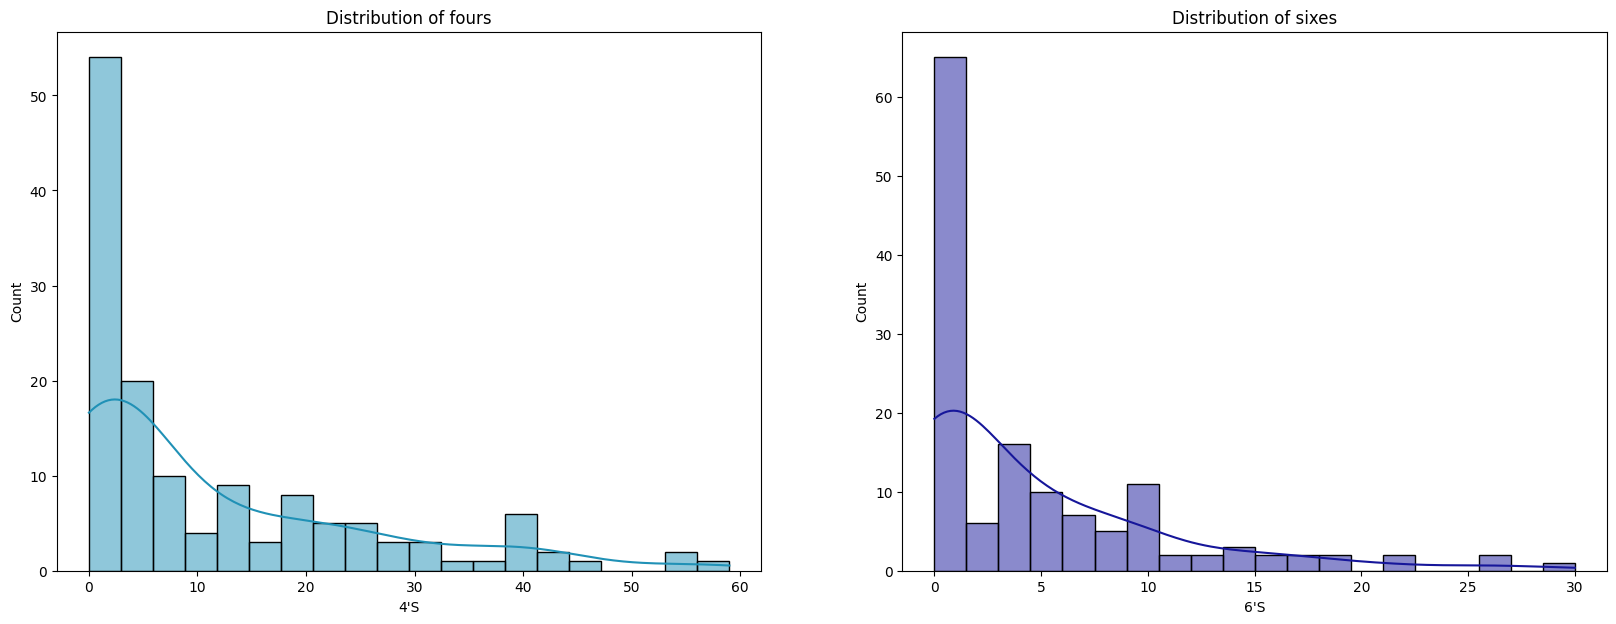

In [1693]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

sns.histplot(ax = axes[0], x = df3["4'S"],
             bins = 20,
             kde = True,   
             cbar = True,
             color = "#2091B6").set(title = "Distribution of fours")

sns.histplot(ax = axes[1], x = df3["6'S"],
             bins = 20,
             kde = True,   
             cbar = True,
             color = "#16169A").set(title = "Distribution of sixes")

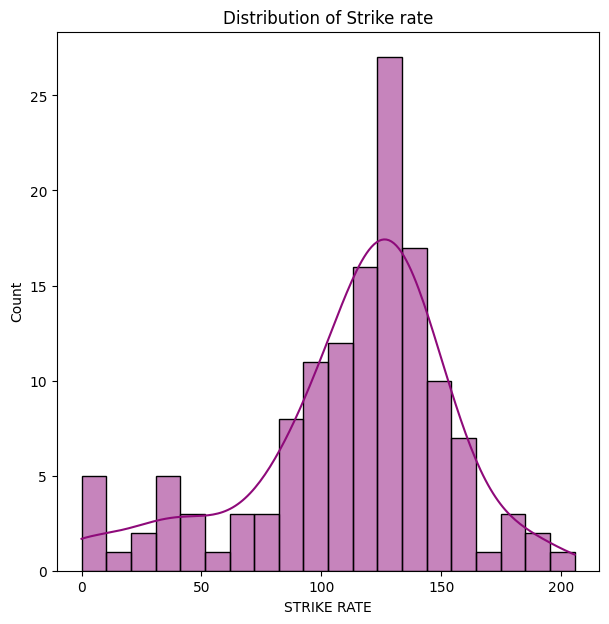

In [1694]:
plt.figure(figsize=(7, 7))  

sns.histplot(df3["STRIKE RATE"],
             bins=20,
             kde=True,   
             cbar=True,
             color="#8E0A7A")

plt.title("Distribution of Strike rate")
plt.show()


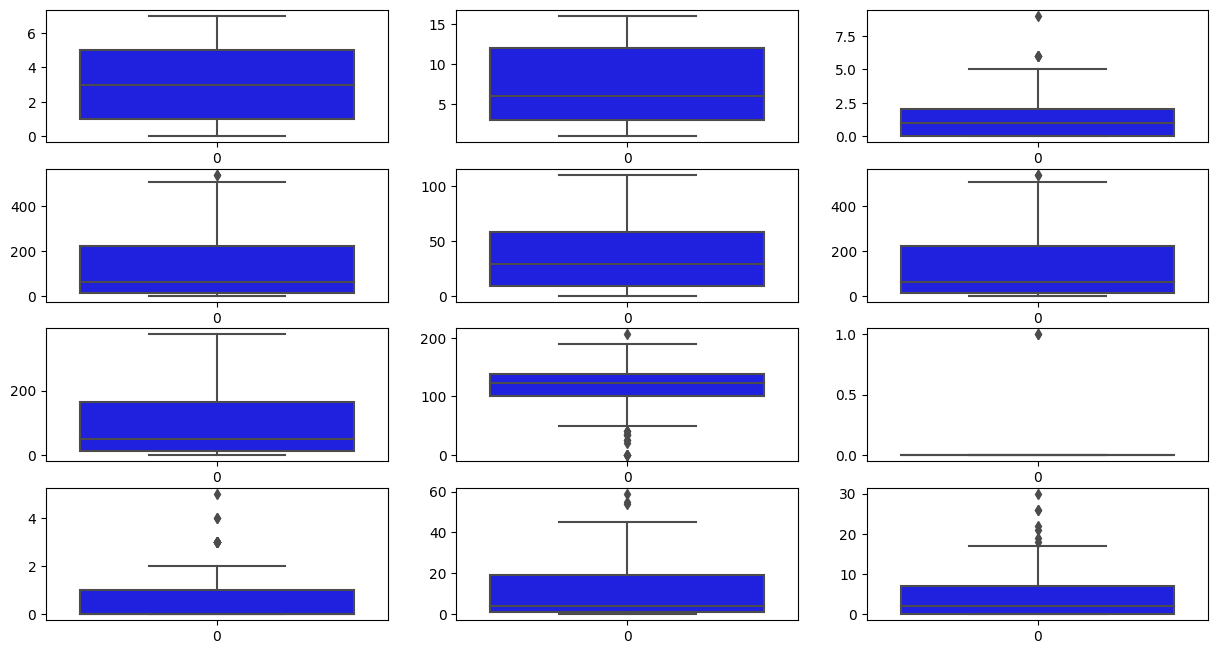

In [1695]:
plt.figure(figsize=(15, 10))
col = 1
for i in df3.drop(columns='PLAYER').columns:
    plt.subplot(5, 3, col)
    sns.boxplot(df3[i],color='blue')
    col += 1

In [1696]:
df3.shape

(138, 13)

In [1697]:
def remove_outliers_iqr(df):
    numeric_df = df.select_dtypes(include=[np.number])
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    mask = ~((numeric_df < lower_bound) | (numeric_df > upper_bound)).any(axis=1)
    return df[mask]

df = remove_outliers_iqr(df3)


In [1698]:
df.shape

(105, 13)

### The outliers are genuine observations, especially in the context of sports performance data, these are crucial for accurate analysis and insights.

## Correlation

In [1699]:
df3.head()

PLAYER  TEAM  INNINGS  NOT OUT   RUNS   HS  AVERAGE  BALL FACED  \
0      Alex Hales     7     15.0      1.0  537.0  110    537.0       336.0   
1     James Vince     6     16.0      2.0  536.0   98    536.0       374.0   
2  Josh Phillippe     6     16.0      0.0  504.0   95    504.0       340.0   
3      Chris Lynn     1     13.0      0.0  456.0   69    456.0       296.0   
4     Colin Munro     5     15.0      1.0  443.0   82    443.0       346.0   

   STRIKE RATE  100'S  50'S   4'S   6'S  
0       159.82    1.0   3.0  54.0  30.0  
1       143.32    0.0   4.0  59.0  11.0  
2       148.24    0.0   3.0  55.0  14.0  
3       154.05    0.0   5.0  39.0  26.0  
4       128.03    0.0   4.0  32.0  19.0

In [1700]:
df_h3 = df3.copy()
df_db3 = df3.copy()

<AxesSubplot: >

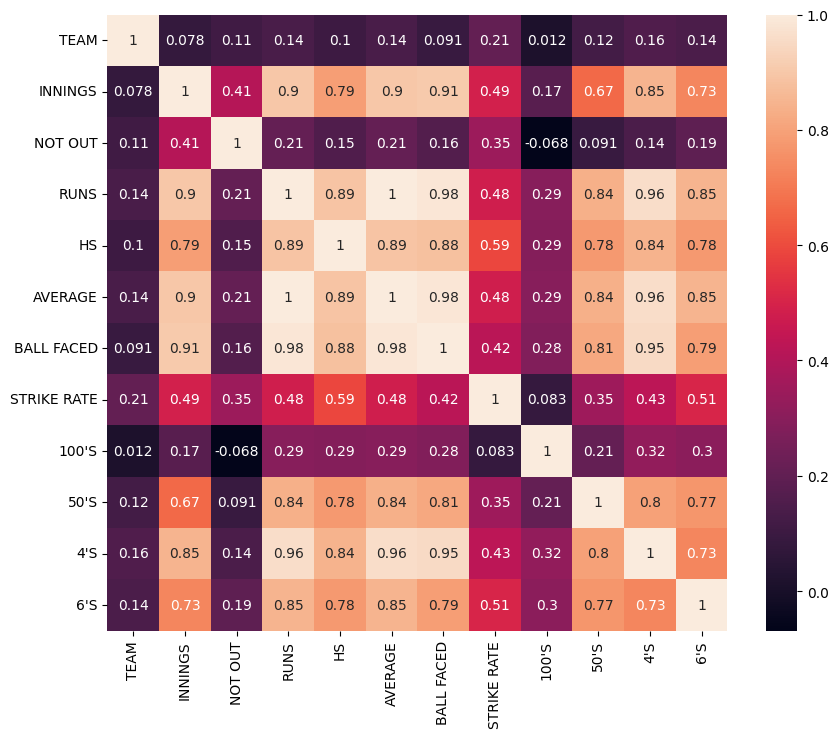

In [1701]:
plt.figure(figsize=(10,8))
corr=df3.drop(columns='PLAYER').corr()
sns.heatmap(corr,annot=True)

In [1702]:
df3.drop(columns=['INNINGS', 'NOT OUT', "100'S", "50'S"], inplace=True)

In [1703]:
df3.head()

PLAYER  TEAM   RUNS   HS  AVERAGE  BALL FACED  STRIKE RATE   4'S  \
0      Alex Hales     7  537.0  110    537.0       336.0       159.82  54.0   
1     James Vince     6  536.0   98    536.0       374.0       143.32  59.0   
2  Josh Phillippe     6  504.0   95    504.0       340.0       148.24  55.0   
3      Chris Lynn     1  456.0   69    456.0       296.0       154.05  39.0   
4     Colin Munro     5  443.0   82    443.0       346.0       128.03  32.0   

    6'S  
0  30.0  
1  11.0  
2  14.0  
3  26.0  
4  19.0

## Z SCORE

In [1704]:
cc = df3.iloc[:, 2:9]
cc1 = cc.apply(zscore)
cc1.head()

RUNS        HS   AVERAGE  BALL FACED  STRIKE RATE       4'S       6'S
0  2.819871  2.543398  2.819871    2.256315     1.138252  3.055626  4.135706
1  2.812947  2.137004  2.812947    2.617679     0.737706  3.413951  1.037471
2  2.591395  2.035405  2.591395    2.294354     0.857142  3.127291  1.526666
3  2.259067  1.154885  2.259067    1.875933     0.998183  1.980652  3.483446
4  2.169062  1.595145  2.169062    2.351411     0.366533  1.478998  2.341991

In [1705]:
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(cc1)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [1706]:
silhouette_score(cc1,labels)

0.5520537887619911

## STANDARD SCALER

In [1707]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cc_scaled = scaler.fit_transform(cc)
cc_scaled_df = pd.DataFrame(cc_scaled, columns=cc.columns)
print(cc_scaled_df.head())

       RUNS        HS   AVERAGE  BALL FACED  STRIKE RATE       4'S       6'S
0  2.819871  2.543398  2.819871    2.256315     1.138252  3.055626  4.135706
1  2.812947  2.137004  2.812947    2.617679     0.737706  3.413951  1.037471
2  2.591395  2.035405  2.591395    2.294354     0.857142  3.127291  1.526666
3  2.259067  1.154885  2.259067    1.875933     0.998183  1.980652  3.483446
4  2.169062  1.595145  2.169062    2.351411     0.366533  1.478998  2.341991


In [1708]:
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(cc1)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [1709]:
silhouette_score(cc_scaled_df,labels)

0.5520537887619911

## MIN MAX SCALER

In [1710]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
cc_min_max_scaled = min_max_scaler.fit_transform(cc)
cc_min_max_scaled_df = pd.DataFrame(cc_min_max_scaled, columns=cc.columns)

print(cc_min_max_scaled_df.head())


       RUNS        HS   AVERAGE  BALL FACED  STRIKE RATE       4'S       6'S
0  1.000000  1.000000  1.000000    0.898123     0.776919  0.915254  1.000000
1  0.998138  0.890909  0.998138    1.000000     0.696709  1.000000  0.366667
2  0.938547  0.863636  0.938547    0.908847     0.720626  0.932203  0.466667
3  0.849162  0.627273  0.849162    0.790885     0.748870  0.661017  0.866667
4  0.824953  0.745455  0.824953    0.924933     0.622381  0.542373  0.633333


In [1711]:
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(cc1)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [1712]:
silhouette_score(cc_min_max_scaled_df,labels)

0.5775433125476255

## K-MEANS Implementation

In [1713]:
df3.head()

PLAYER  TEAM   RUNS   HS  AVERAGE  BALL FACED  STRIKE RATE   4'S  \
0      Alex Hales     7  537.0  110    537.0       336.0       159.82  54.0   
1     James Vince     6  536.0   98    536.0       374.0       143.32  59.0   
2  Josh Phillippe     6  504.0   95    504.0       340.0       148.24  55.0   
3      Chris Lynn     1  456.0   69    456.0       296.0       154.05  39.0   
4     Colin Munro     5  443.0   82    443.0       346.0       128.03  32.0   

    6'S  
0  30.0  
1  11.0  
2  14.0  
3  26.0  
4  19.0

In [1714]:
cc =df3.iloc[:, 2:9]
cc.head()

RUNS   HS  AVERAGE  BALL FACED  STRIKE RATE   4'S   6'S
0  537.0  110    537.0       336.0       159.82  54.0  30.0
1  536.0   98    536.0       374.0       143.32  59.0  11.0
2  504.0   95    504.0       340.0       148.24  55.0  14.0
3  456.0   69    456.0       296.0       154.05  39.0  26.0
4  443.0   82    443.0       346.0       128.03  32.0  19.0

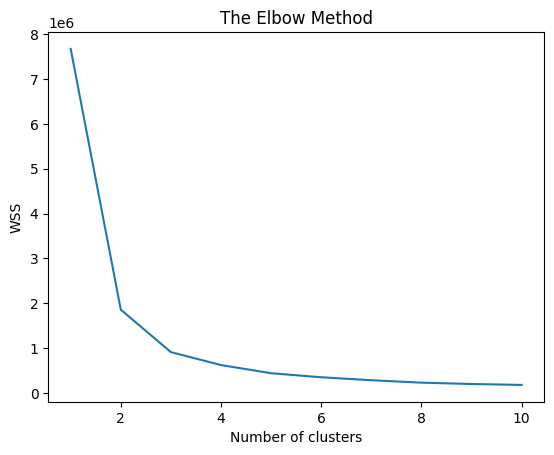

In [1715]:
from sklearn.cluster import KMeans
wss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,random_state=0)
    kmeans.fit(cc)
    wss.append(kmeans.inertia_)
plt.plot(range(1, 11), wss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

In [1716]:
kmeans = KMeans(n_clusters=2,init='k-means++',random_state=0)
kmeans.fit(cc)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [1717]:
silhouette_score(cc,labels)

0.6686391783396989

In [1718]:
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
}


silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(cc)
    score = silhouette_score(cc,kmeans.labels_)
    silhouette_coefficients.append(score)

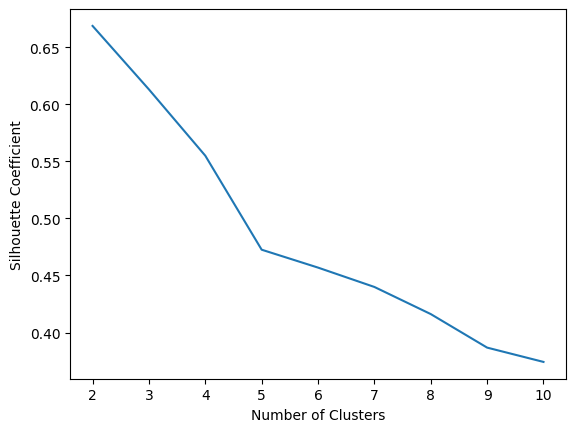

In [1719]:
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [1720]:
df3['cluster']=labels
df3.head()

PLAYER  TEAM   RUNS   HS  AVERAGE  BALL FACED  STRIKE RATE   4'S  \
0      Alex Hales     7  537.0  110    537.0       336.0       159.82  54.0   
1     James Vince     6  536.0   98    536.0       374.0       143.32  59.0   
2  Josh Phillippe     6  504.0   95    504.0       340.0       148.24  55.0   
3      Chris Lynn     1  456.0   69    456.0       296.0       154.05  39.0   
4     Colin Munro     5  443.0   82    443.0       346.0       128.03  32.0   

    6'S  cluster  
0  30.0        1  
1  11.0        1  
2  14.0        1  
3  26.0        1  
4  19.0        1

In [1721]:
df3.cluster.value_counts().sort_index()

0    98
1    40
Name: cluster, dtype: int64

In [1722]:
df3.head(10)

PLAYER  TEAM   RUNS   HS  AVERAGE  BALL FACED  STRIKE RATE   4'S  \
0        Alex Hales     7  537.0  110    537.0       336.0       159.82  54.0   
1       James Vince     6  536.0   98    536.0       374.0       143.32  59.0   
2    Josh Phillippe     6  504.0   95    504.0       340.0       148.24  55.0   
3        Chris Lynn     1  456.0   69    456.0       296.0       154.05  39.0   
4       Colin Munro     5  443.0   82    443.0       346.0       128.03  32.0   
5   Jake Weatherald     0  433.0   80    433.0       307.0       141.04  37.0   
6  Liam Livingstone     5  426.0   77    426.0       318.0       133.96  26.0   
7        Alex Carey     0  425.0  101    425.0       348.0       122.13  43.0   
8       Josh Inglis     5  413.0   72    413.0       254.0       162.60  40.0   
9   Callum Ferguson     7  405.0   61    405.0       327.0       123.85  39.0   

    6'S  cluster  
0  30.0        1  
1  11.0        1  
2  14.0        1  
3  26.0        1  
4  19.0        1  
5  22.0        1  
6  26.0        1  
7  10.0        1  
8   9.0        1  
9   6.0        1

In [1723]:
aggdata=df3.iloc[:, 2:10].groupby('cluster').mean()
aggdata['Freq']=df3.cluster.value_counts().sort_index()
aggdata

RUNS     HS     AVERAGE  BALL FACED  STRIKE RATE        4'S  \
cluster                                                                      
0         48.112245  21.00   48.112245   39.357143   103.424592   3.826531   
1        329.625000  68.95  329.625000  244.200000   136.222250  29.825000   

               6'S  Freq  
cluster                   
0         1.734694    98  
1        11.750000    40

In [1724]:
df3['cluster'] = df3['cluster'].replace({1: 'Grade A', 0: 'Grade B'})

In [1725]:
Grade_A = df3[df3['cluster'] == 'Grade A']
Grade_A.head(10)

PLAYER  TEAM   RUNS   HS  AVERAGE  BALL FACED  STRIKE RATE   4'S  \
0        Alex Hales     7  537.0  110    537.0       336.0       159.82  54.0   
1       James Vince     6  536.0   98    536.0       374.0       143.32  59.0   
2    Josh Phillippe     6  504.0   95    504.0       340.0       148.24  55.0   
3        Chris Lynn     1  456.0   69    456.0       296.0       154.05  39.0   
4       Colin Munro     5  443.0   82    443.0       346.0       128.03  32.0   
5   Jake Weatherald     0  433.0   80    433.0       307.0       141.04  37.0   
6  Liam Livingstone     5  426.0   77    426.0       318.0       133.96  26.0   
7        Alex Carey     0  425.0  101    425.0       348.0       122.13  43.0   
8       Josh Inglis     5  413.0   72    413.0       254.0       162.60  40.0   
9   Callum Ferguson     7  405.0   61    405.0       327.0       123.85  39.0   

    6'S  cluster  
0  30.0  Grade A  
1  11.0  Grade A  
2  14.0  Grade A  
3  26.0  Grade A  
4  19.0  Grade A  
5  22.0  Grade A  
6  26.0  Grade A  
7  10.0  Grade A  
8   9.0  Grade A  
9   6.0  Grade A

In [1726]:
Grade_B = df3[df3['cluster'] == 'Grade B']
Grade_B.head()

PLAYER  TEAM   RUNS  HS  AVERAGE  BALL FACED  STRIKE RATE  \
40        Sam Heazlett     1  180.0  74    180.0       133.0       135.34   
41           Joe Burns     1  180.0  52    180.0       144.0       125.00   
42         Aaron Finch     3  179.0  39    179.0       158.0       113.29   
43  Marnus Labuschagne     1  176.0  49    176.0       143.0       123.08   
44       Lewis Gregory     1  173.0  36    173.0       130.0       133.08   

     4'S  6'S  cluster  
40  14.0  9.0  Grade B  
41  18.0  5.0  Grade B  
42  20.0  3.0  Grade B  
43  13.0  3.0  Grade B  
44  13.0  8.0  Grade B

In [1727]:
df3_subset = df3.iloc[:, 2:9].copy()
df3_subset['cluster'] = df3['cluster']

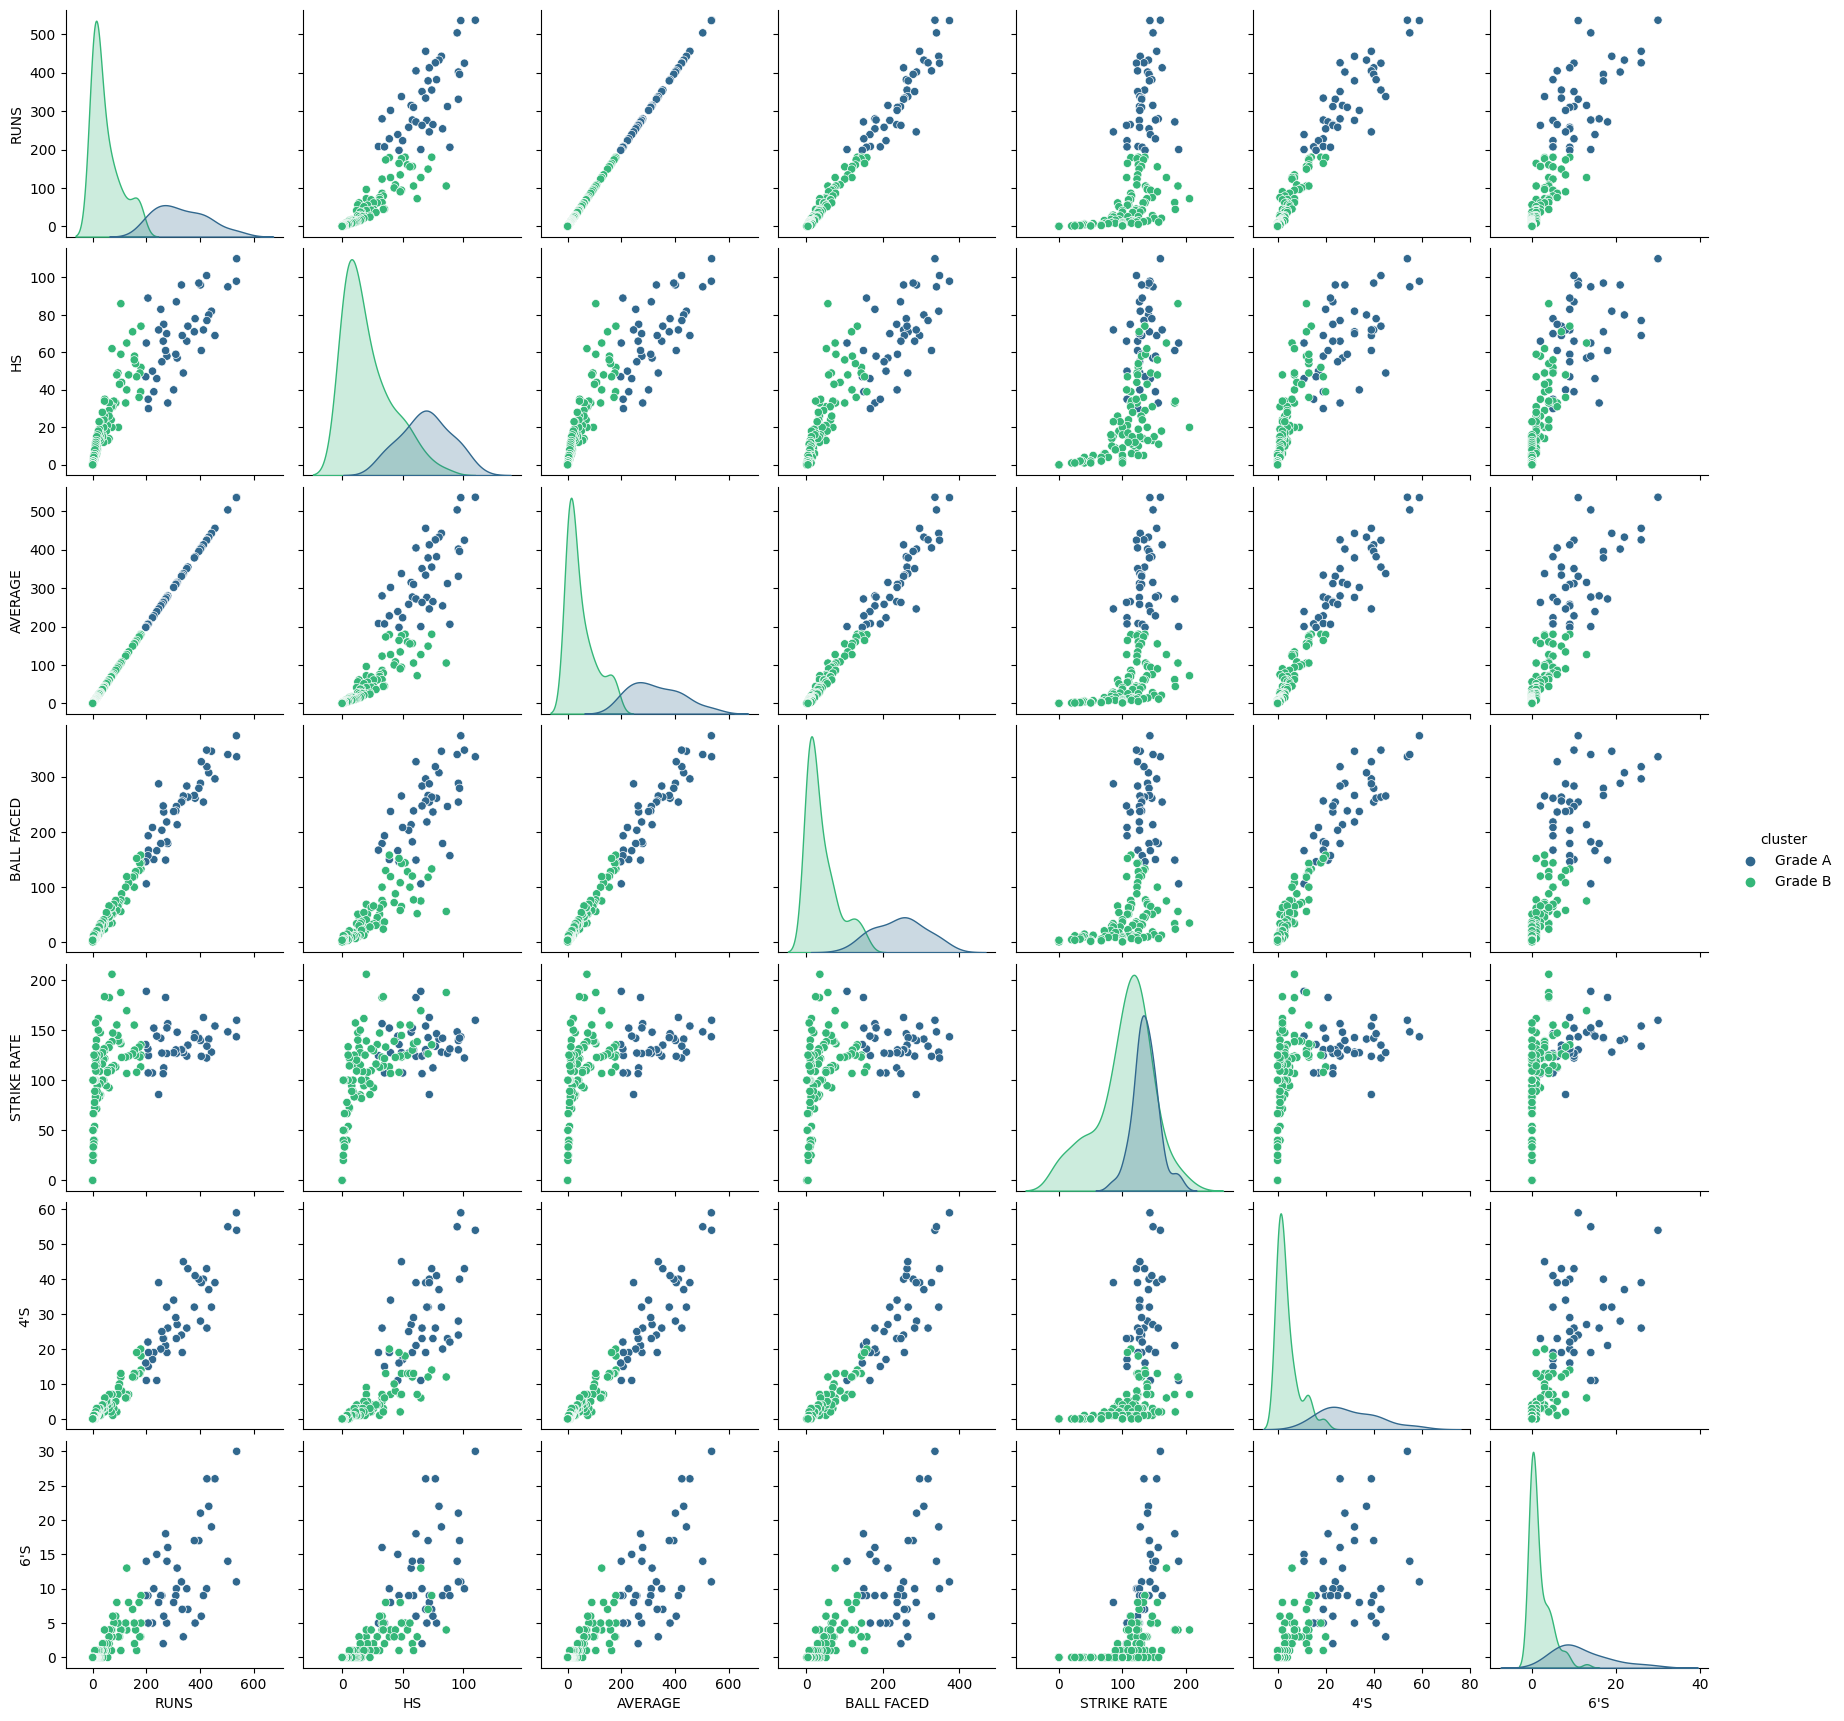

In [1728]:
sns.pairplot(df3_subset, hue='cluster', palette='viridis')
plt.show()

##  HIERARCHICAL CLUSTERING

In [1729]:
cc = df_h3.iloc[:, 2:9]

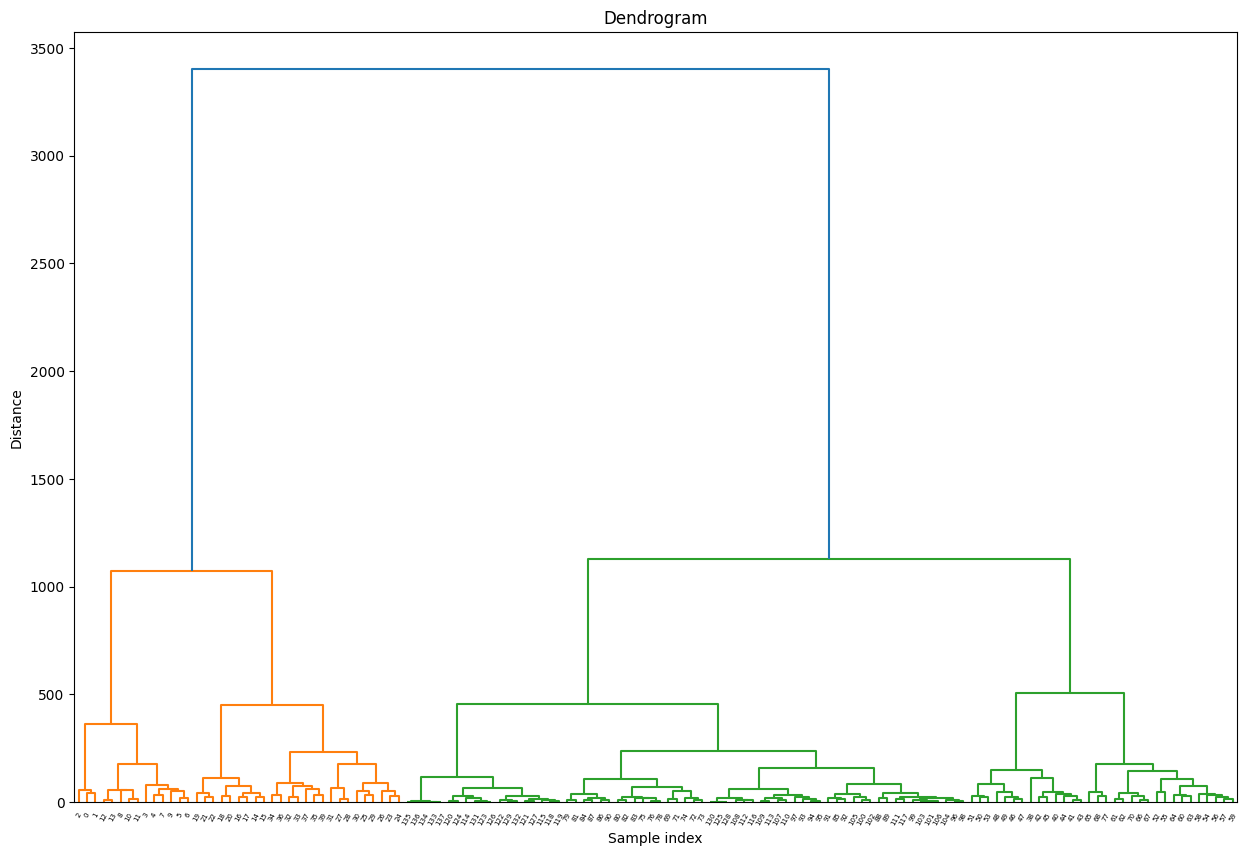

In [1730]:
linkage_matrix = linkage(cc, method='ward')
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.xticks(rotation=60)
plt.show()

In [1731]:
num_clusters = 2

model = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
clusters = model.fit_predict(cc)

silhouette_avg = silhouette_score(cc, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.67


In [1732]:
df_h3['Cluster'] = clusters
df3.head()

PLAYER  TEAM   RUNS   HS  AVERAGE  BALL FACED  STRIKE RATE   4'S  \
0      Alex Hales     7  537.0  110    537.0       336.0       159.82  54.0   
1     James Vince     6  536.0   98    536.0       374.0       143.32  59.0   
2  Josh Phillippe     6  504.0   95    504.0       340.0       148.24  55.0   
3      Chris Lynn     1  456.0   69    456.0       296.0       154.05  39.0   
4     Colin Munro     5  443.0   82    443.0       346.0       128.03  32.0   

    6'S  cluster  
0  30.0  Grade A  
1  11.0  Grade A  
2  14.0  Grade A  
3  26.0  Grade A  
4  19.0  Grade A

In [1733]:
df_h3.head(10)

PLAYER  TEAM  INNINGS  NOT OUT   RUNS   HS  AVERAGE  BALL FACED  \
0        Alex Hales     7     15.0      1.0  537.0  110    537.0       336.0   
1       James Vince     6     16.0      2.0  536.0   98    536.0       374.0   
2    Josh Phillippe     6     16.0      0.0  504.0   95    504.0       340.0   
3        Chris Lynn     1     13.0      0.0  456.0   69    456.0       296.0   
4       Colin Munro     5     15.0      1.0  443.0   82    443.0       346.0   
5   Jake Weatherald     0     15.0      3.0  433.0   80    433.0       307.0   
6  Liam Livingstone     5     14.0      0.0  426.0   77    426.0       318.0   
7        Alex Carey     0     13.0      0.0  425.0  101    425.0       348.0   
8       Josh Inglis     5     16.0      4.0  413.0   72    413.0       254.0   
9   Callum Ferguson     7     15.0      2.0  405.0   61    405.0       327.0   

   STRIKE RATE  100'S  50'S   4'S   6'S  Cluster  
0       159.82    1.0   3.0  54.0  30.0        1  
1       143.32    0.0   4.0  59.0  11.0        1  
2       148.24    0.0   3.0  55.0  14.0        1  
3       154.05    0.0   5.0  39.0  26.0        1  
4       128.03    0.0   4.0  32.0  19.0        1  
5       141.04    0.0   3.0  37.0  22.0        1  
6       133.96    0.0   3.0  26.0  26.0        1  
7       122.13    1.0   2.0  43.0  10.0        1  
8       162.60    0.0   3.0  40.0   9.0        1  
9       123.85    0.0   3.0  39.0   6.0        1

In [1734]:
df_h3['Cluster'] = df_h3['Cluster'].replace({0: 'Grade A', 1: 'Grade B'})

In [1735]:
Grade_A = df_h3[df_h3['Cluster'] == 'Grade A']
Grade_A.head(10)

PLAYER  TEAM  INNINGS  NOT OUT   RUNS  HS  AVERAGE  \
38         Daniel Sams     7      8.0      3.0  200.0  65    200.0   
40        Sam Heazlett     1      9.0      1.0  180.0  74    180.0   
41           Joe Burns     1     11.0      3.0  180.0  52    180.0   
42         Aaron Finch     3     13.0      0.0  179.0  39    179.0   
43  Marnus Labuschagne     1      6.0      0.0  176.0  49    176.0   
44       Lewis Gregory     1     12.0      3.0  173.0  36    173.0   
45        Jack Edwards     6      9.0      0.0  164.0  47    164.0   
46        Beau Webster     3     10.0      3.0  160.0  54    160.0   
47    Cameron Bancroft     5      7.0      3.0  156.0  58    156.0   
48    Moises Henriques     6      4.0      0.0  155.0  56    155.0   

    BALL FACED  STRIKE RATE  100'S  50'S   4'S   6'S  Cluster  
38       106.0       188.68    0.0   2.0  11.0  14.0  Grade A  
40       133.0       135.34    0.0   1.0  14.0   9.0  Grade A  
41       144.0       125.00    0.0   1.0  18.0   5.0  Grade A  
42       158.0       113.29    0.0   0.0  20.0   3.0  Grade A  
43       143.0       123.08    0.0   0.0  13.0   3.0  Grade A  
44       130.0       133.08    0.0   0.0  13.0   8.0  Grade A  
45       152.0       107.89    0.0   0.0  19.0   1.0  Grade A  
46       128.0       125.00    0.0   2.0  13.0   4.0  Grade A  
47       120.0       130.00    0.0   1.0  12.0   2.0  Grade A  
48       100.0       155.00    0.0   1.0  13.0   5.0  Grade A

In [1736]:
Grade_B = df_h3[df_h3['Cluster'] == 'Grade B']
Grade_B.head()

PLAYER  TEAM  INNINGS  NOT OUT   RUNS   HS  AVERAGE  BALL FACED  \
0      Alex Hales     7     15.0      1.0  537.0  110    537.0       336.0   
1     James Vince     6     16.0      2.0  536.0   98    536.0       374.0   
2  Josh Phillippe     6     16.0      0.0  504.0   95    504.0       340.0   
3      Chris Lynn     1     13.0      0.0  456.0   69    456.0       296.0   
4     Colin Munro     5     15.0      1.0  443.0   82    443.0       346.0   

   STRIKE RATE  100'S  50'S   4'S   6'S  Cluster  
0       159.82    1.0   3.0  54.0  30.0  Grade B  
1       143.32    0.0   4.0  59.0  11.0  Grade B  
2       148.24    0.0   3.0  55.0  14.0  Grade B  
3       154.05    0.0   5.0  39.0  26.0  Grade B  
4       128.03    0.0   4.0  32.0  19.0  Grade B

In [1737]:
df3_subset = df_h3.iloc[:, 2:9].copy()
df3_subset['Cluster'] = df_h3['Cluster']

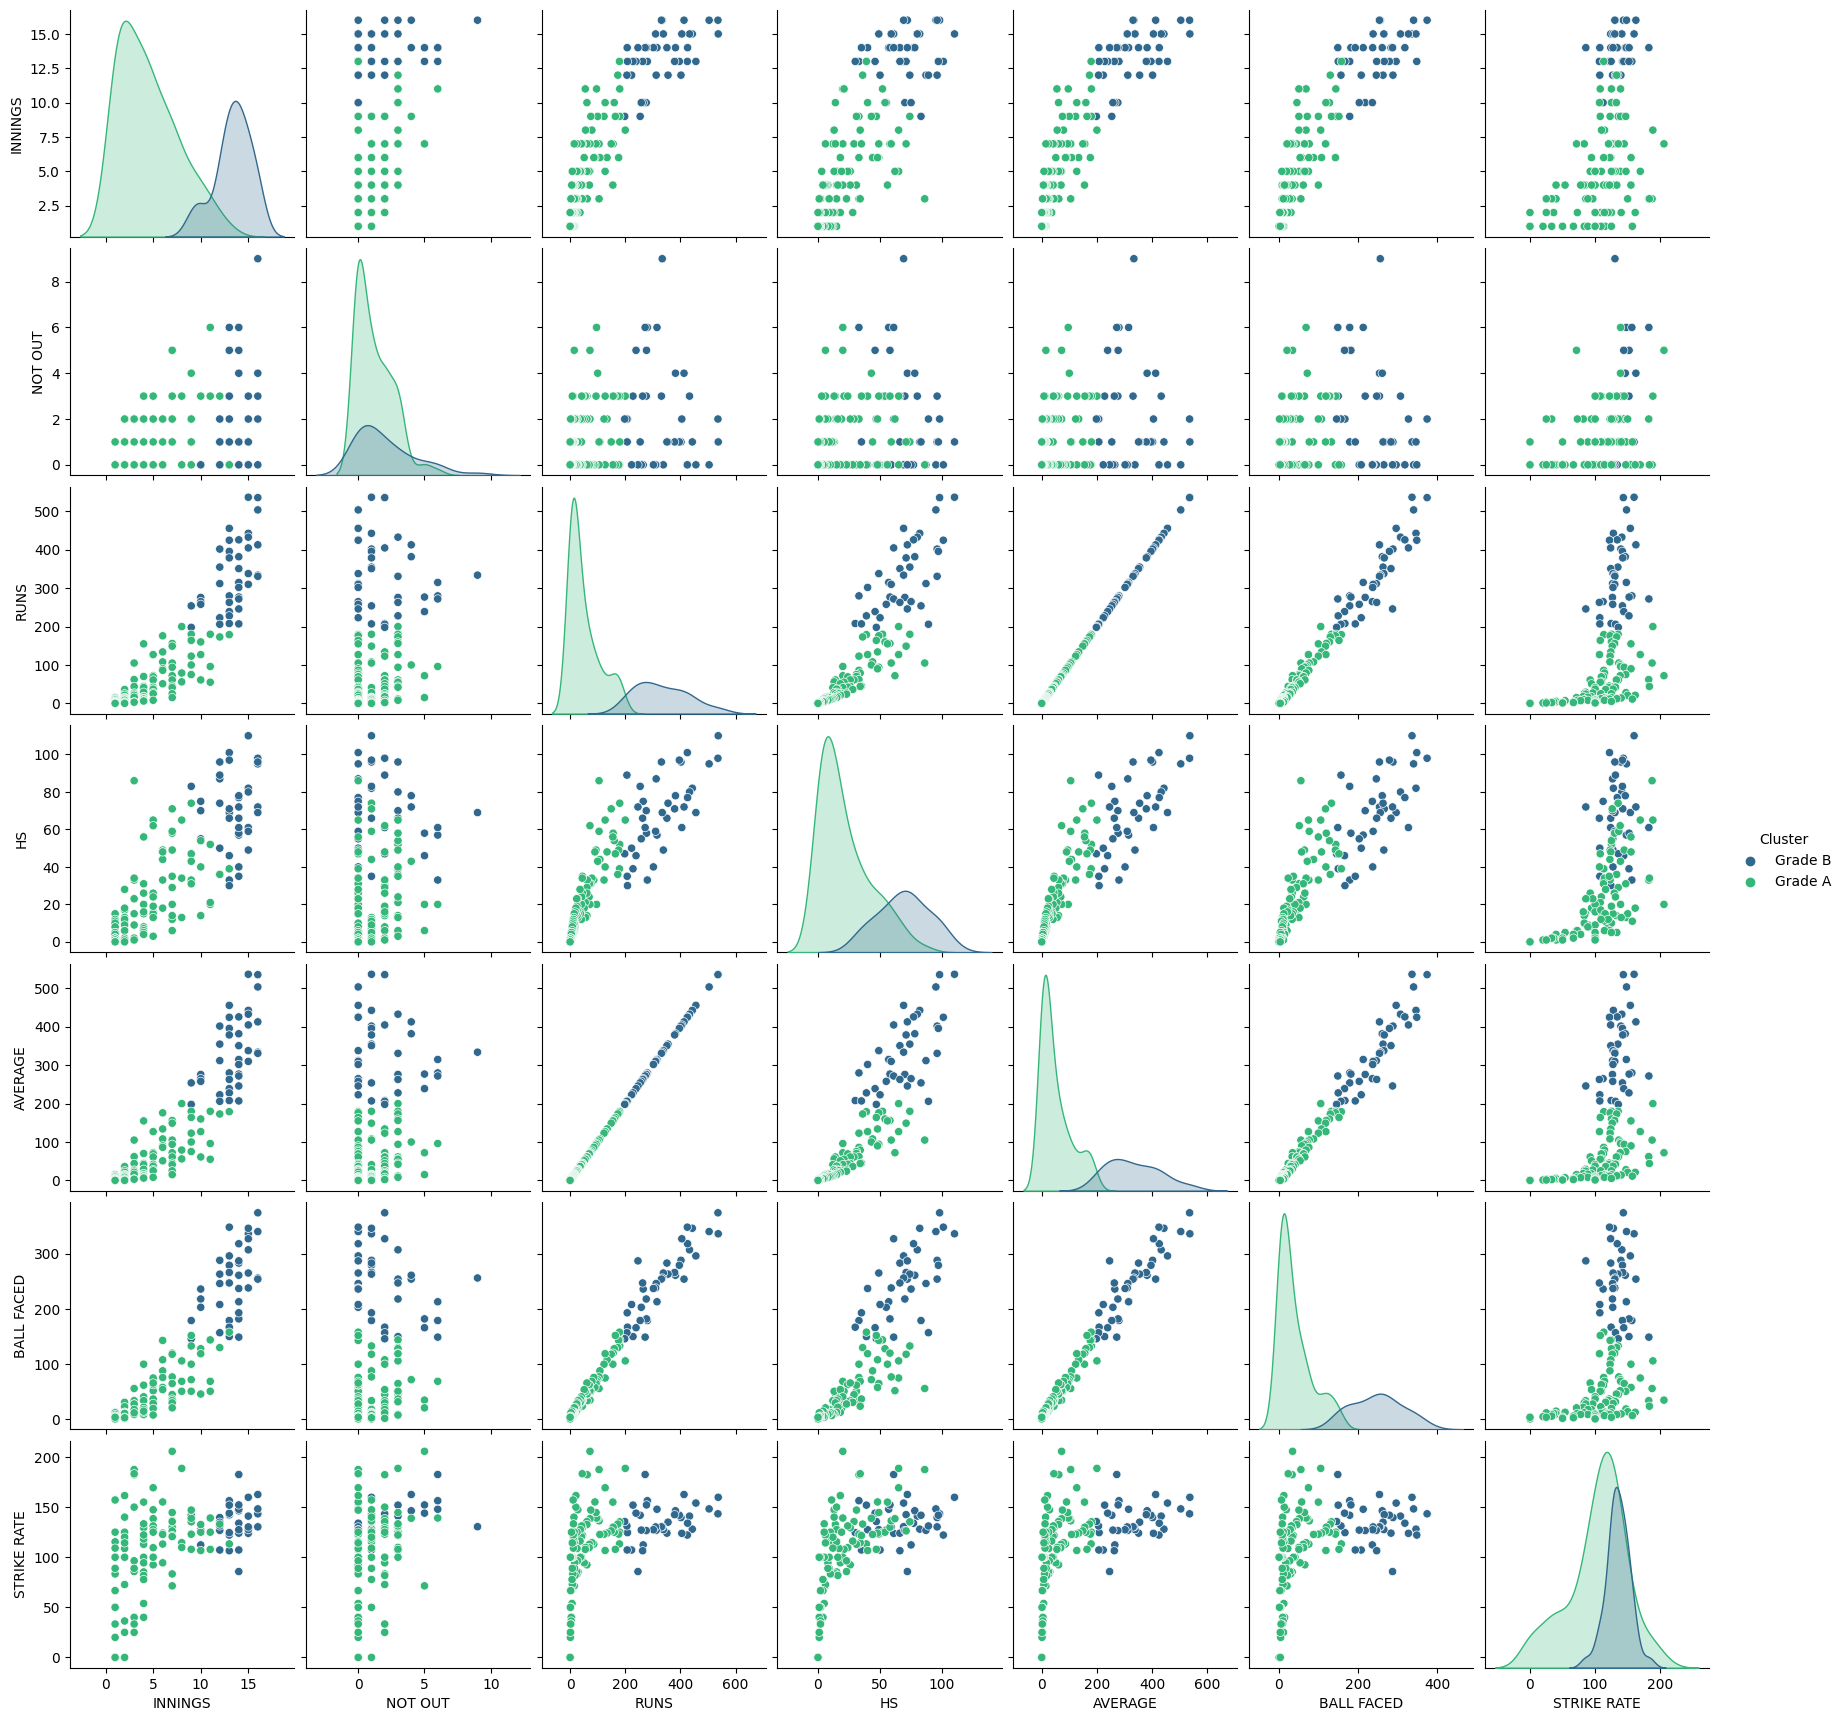

In [1738]:
sns.pairplot(df3_subset, hue='Cluster', palette='viridis')
plt.show()

## DB SCAN CLUSTERING

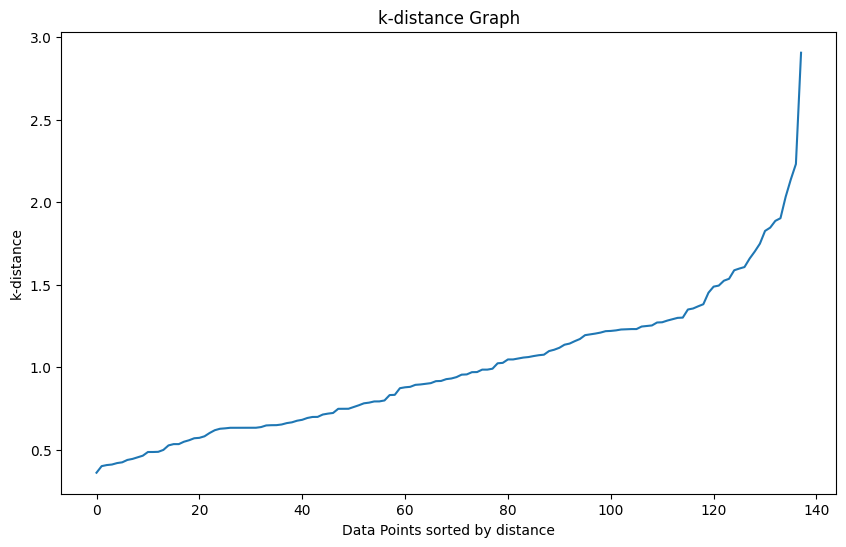

In [1739]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(df_db3.iloc[:, 2:9])


min_samples = 6


neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X_train_scaled)
distances, indices = neighbors_fit.kneighbors(X_train_scaled)

distances = np.sort(distances[:, min_samples-1], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Data Points sorted by distance')
plt.ylabel('k-distance')
plt.title('k-distance Graph')
plt.show()

Estimated number of clusters: 2
Estimated number of noise points: 19
Silhouette Score: 0.40


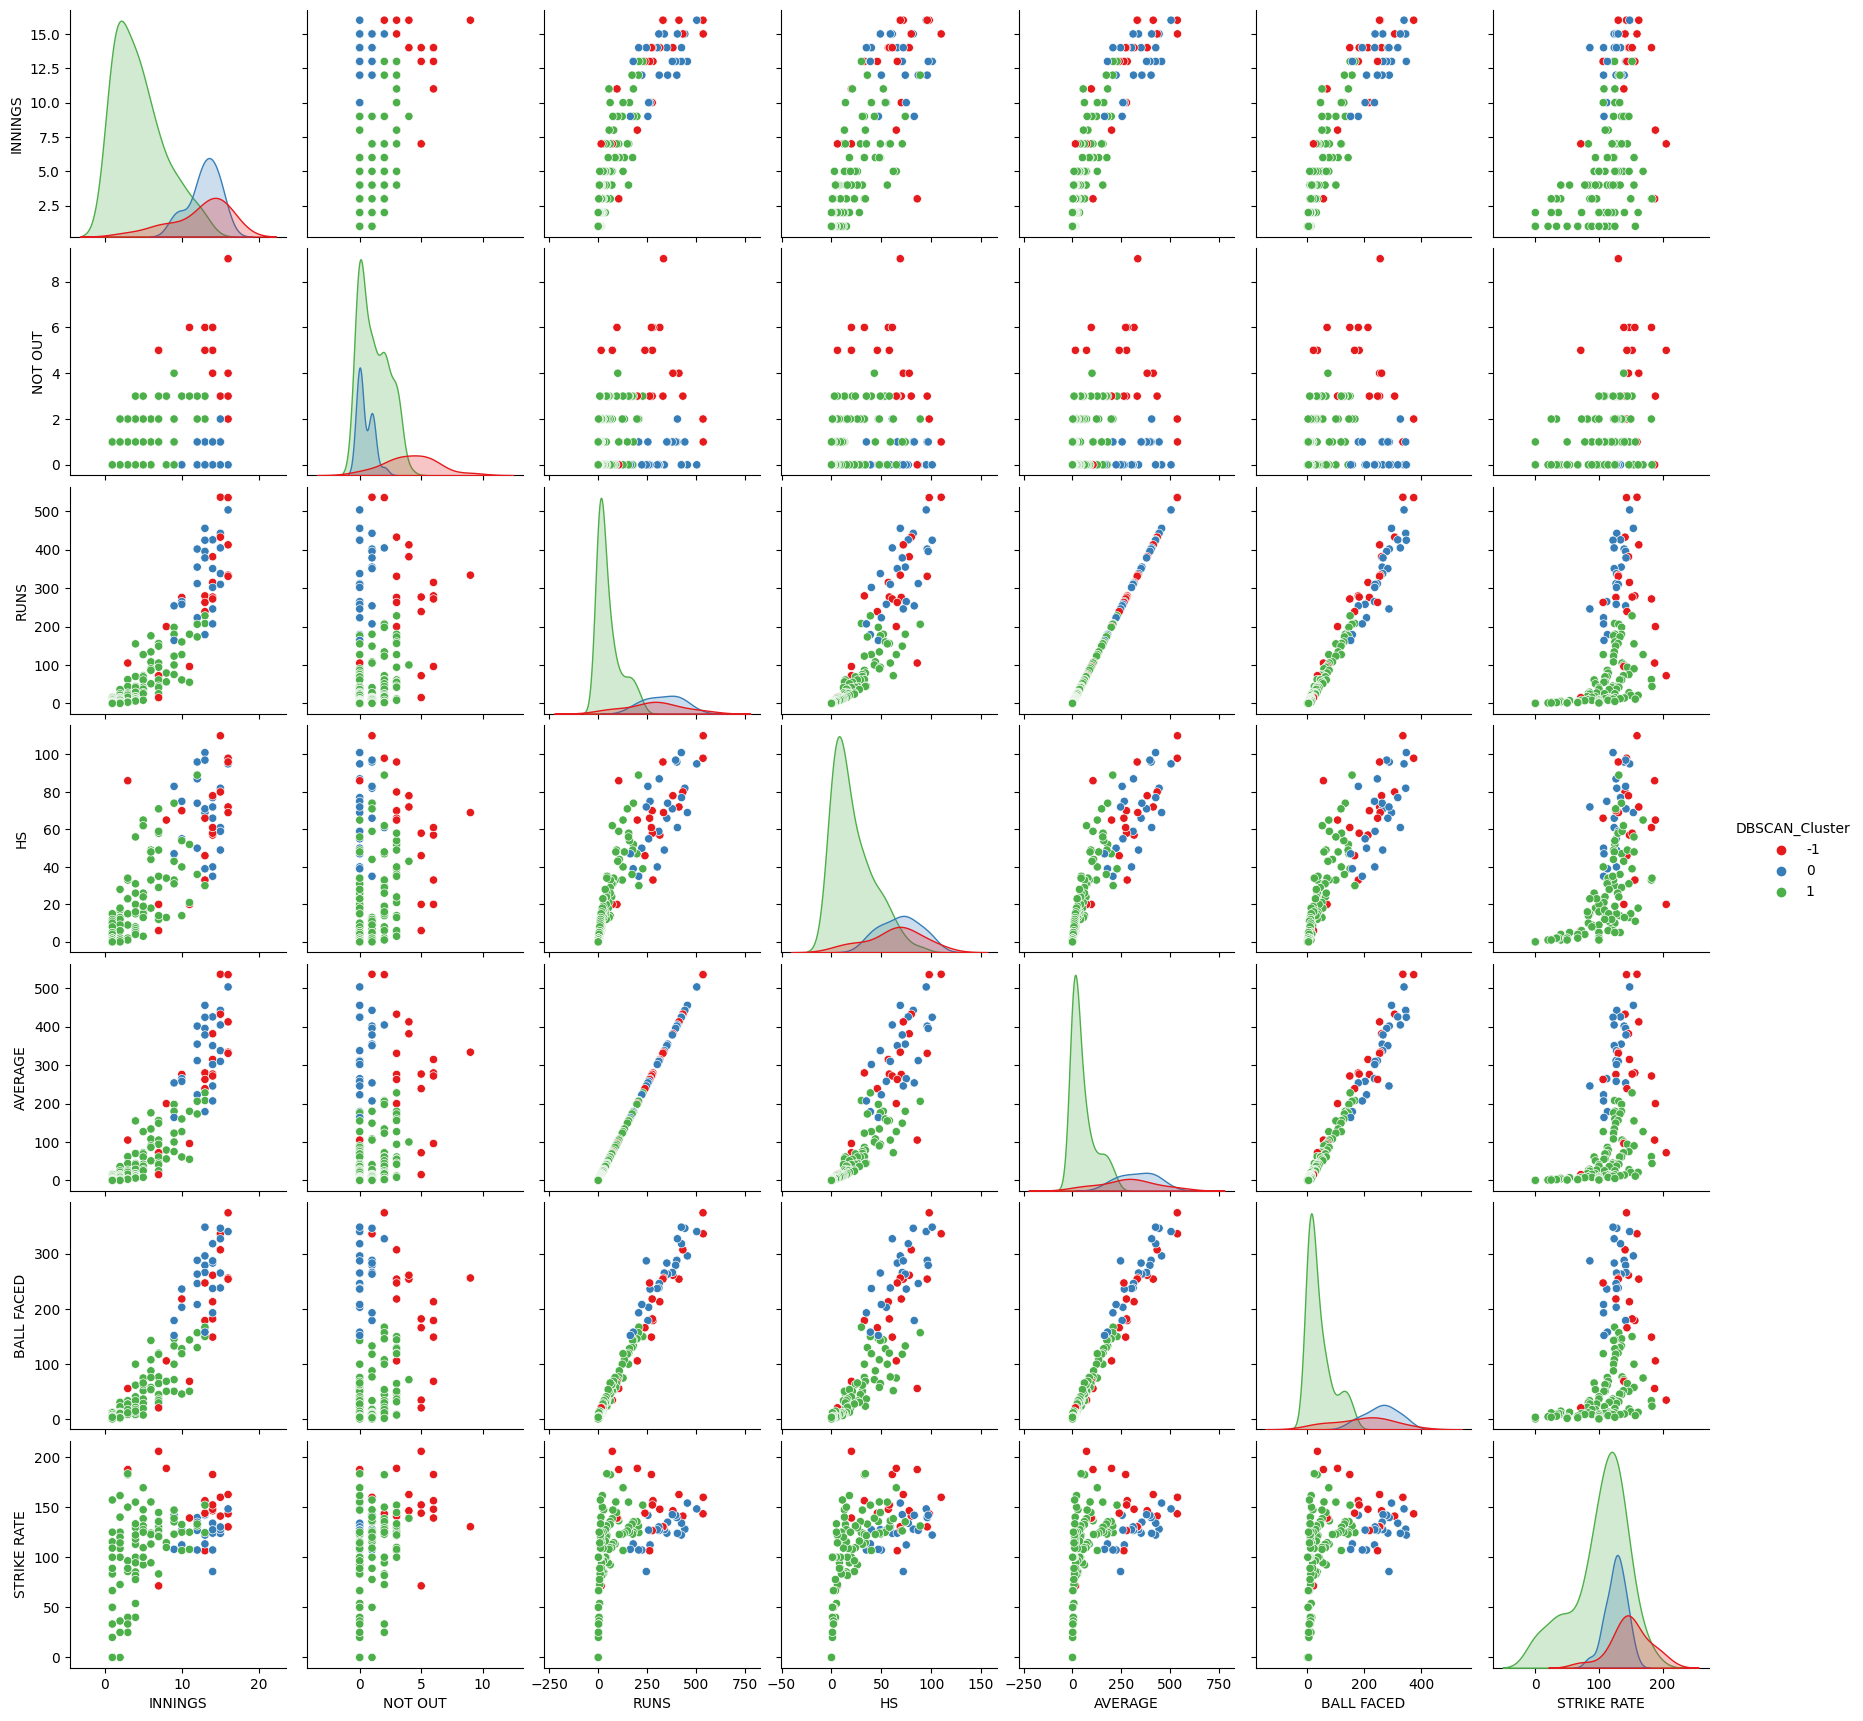

In [1740]:
epsilon = 1.2

dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
train_labels = dbscan.fit_predict(X_train_scaled)


n_clusters = len(set(train_labels)) - (1 if -1 in train_labels else 0)
n_noise = list(train_labels).count(-1)

print(f'Estimated number of clusters: {n_clusters}')
print(f'Estimated number of noise points: {n_noise}')

cc['DBSCAN_Cluster'] = dbscan.labels_

if len(set(dbscan.labels_)) > 1:
    silhouette_avg = silhouette_score(X_train_scaled, dbscan.labels_)
    print(f'Silhouette Score: {silhouette_avg:.2f}')
else:
    print("DBSCAN did not find more than one cluster.")
    
sns.pairplot(cc, hue='DBSCAN_Cluster', palette='Set1')
plt.show()

## BOWLING DATA

Text(0.5, 1.0, 'Top 10 Players by taking Wickets')

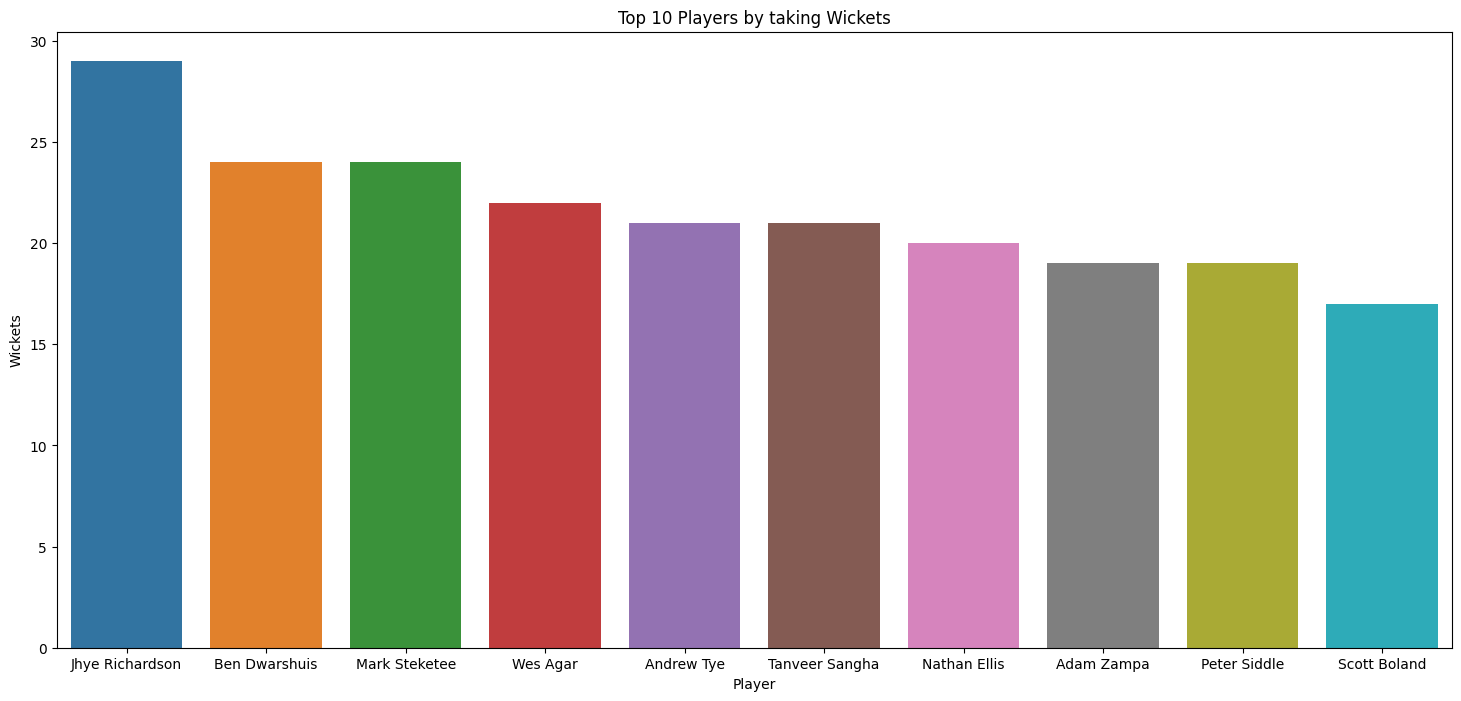

In [1741]:
plt.figure(figsize=(18,8))
b1=df4.groupby('PLAYER')['WICKETS'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Player' ,'Wickets']
sns.barplot(data= b1 , x= 'Player' , y ='Wickets')
plt.title("Top 10 Players by taking Wickets")

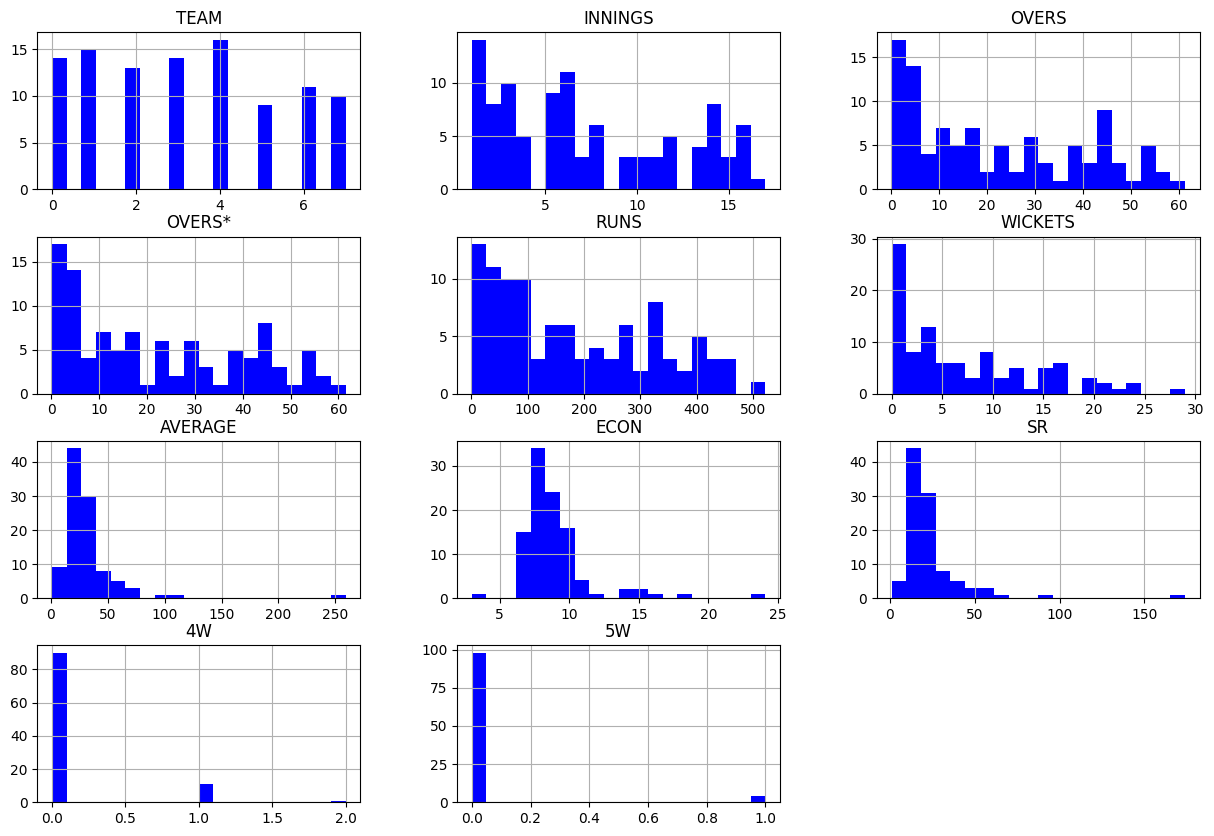

In [1742]:
df4.hist(bins = 20, figsize = (15, 10), color = 'blue')
plt.show()

In [1743]:
def transform_format(s):
    parts = s.split('\\')
    return int(int(parts[1]) - int(parts[0]))

In [1744]:
df4['BBI'] = df4['BBI'].apply(transform_format)
df4.head()

PLAYER  TEAM  INNINGS  OVERS  OVERS*  RUNS  WICKETS  BBI  \
0  Jhye Richardson     5       17   61.3  61.500   463       29   20   
1    Ben Dwarshuis     6       13   45.3  45.500   403       24    9   
2    Mark Steketee     1       16   56.2  56.333   522       24   29   
3         Wes Agar     0       15   54.4  54.667   457       22   23   
4   Tanveer Sangha     7       15   47.3  47.500   394       21   10   

     AVERAGE      ECON         SR  4W  5W  
0  15.965517  7.528455  12.724138   2   0  
1  16.791667  8.857143  11.375000   1   0  
2  21.750000  9.266327  14.083250   1   0  
3  20.772727  8.359705  14.909182   1   0  
4  18.761905  8.294737  13.571429   1   0

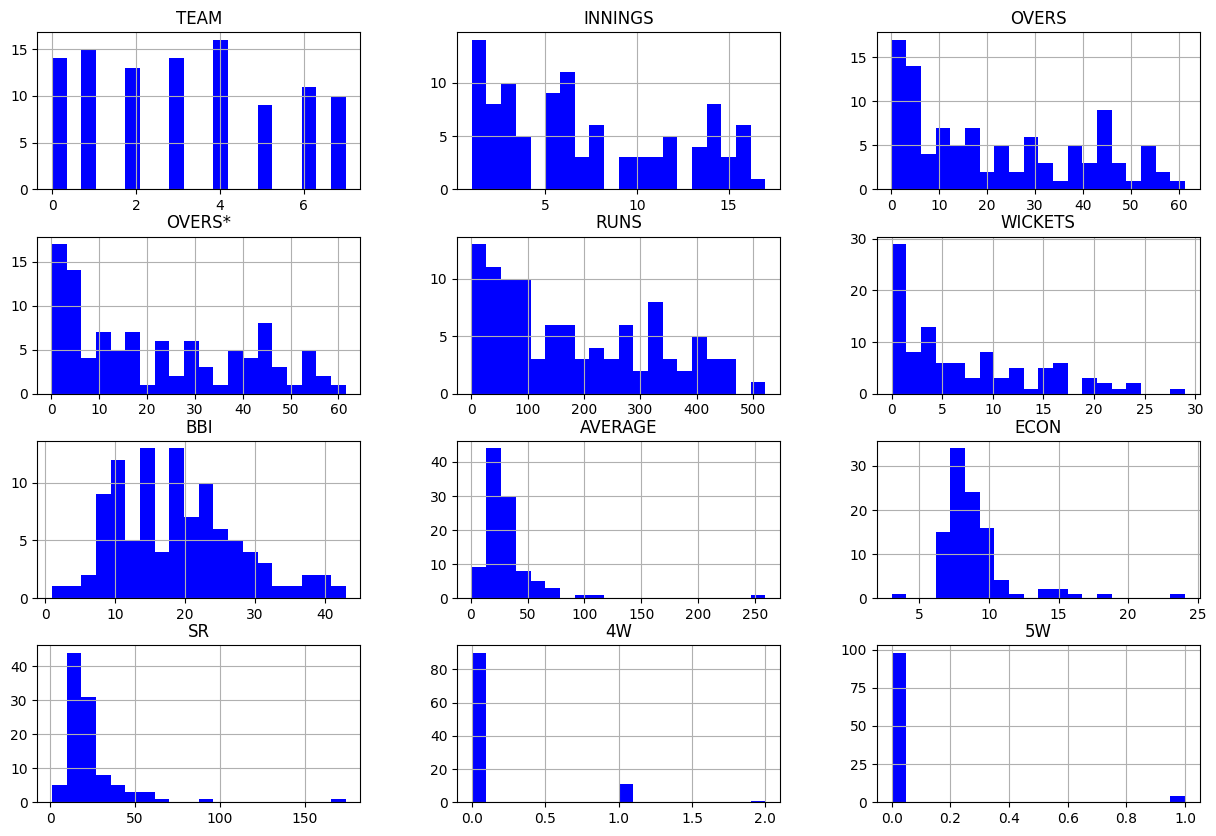

In [1745]:
df4.hist(bins = 20, figsize = (15, 10), color = 'blue')
plt.show()

<AxesSubplot: >

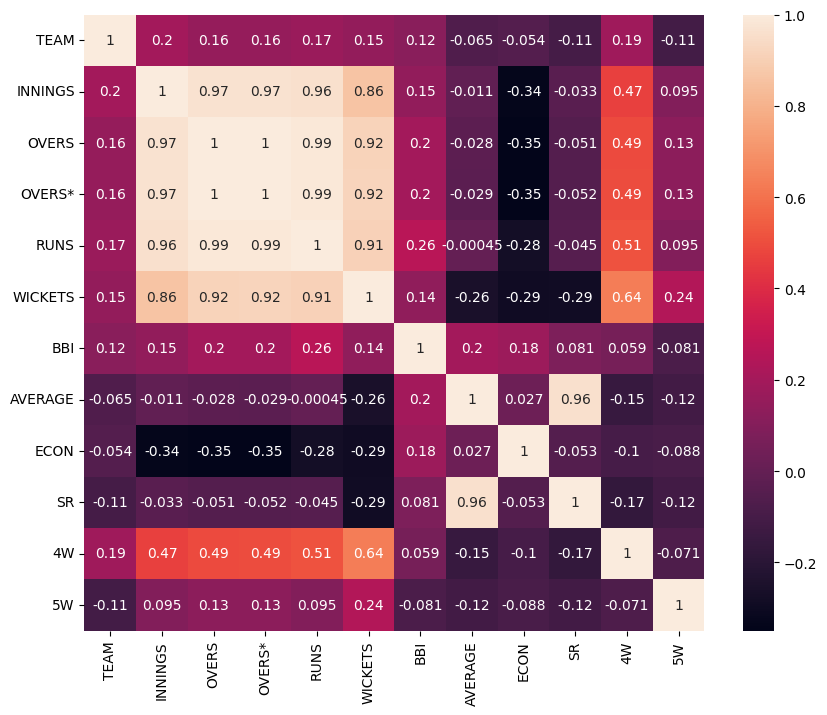

In [1746]:
plt.figure(figsize=(10,8))
corr=df4.drop(columns='PLAYER').corr()
sns.heatmap(corr,annot=True)

In [1747]:
df4.drop(columns=['INNINGS','OVERS*','BBI','AVERAGE','SR','4W','5W'], inplace=True)

In [1748]:
df_h4 = df4.copy()
df_db4 = df4.copy()

In [1749]:
df4.head()

PLAYER  TEAM  OVERS  RUNS  WICKETS      ECON
0  Jhye Richardson     5   61.3   463       29  7.528455
1    Ben Dwarshuis     6   45.3   403       24  8.857143
2    Mark Steketee     1   56.2   522       24  9.266327
3         Wes Agar     0   54.4   457       22  8.359705
4   Tanveer Sangha     7   47.3   394       21  8.294737

## Z SCORE

In [1750]:
cc = df4.iloc[:,2:8]
cc1 = cc.apply(zscore)
cc1.head()

OVERS      RUNS   WICKETS      ECON
0  2.188885  1.993244  3.138834 -0.499300
1  1.292278  1.569474  2.421949  0.004229
2  1.903092  2.409952  2.421949  0.159297
3  1.802224  1.950867  2.135195 -0.184284
4  1.404354  1.505908  1.991817 -0.208904

In [1751]:
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(cc1)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [1752]:
silhouette_score(cc1,labels)

0.515114403673124

## Standard Scaler

In [1753]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cc_scaled = scaler.fit_transform(cc)
cc_scaled_df = pd.DataFrame(cc_scaled, columns=cc.columns)
print(cc_scaled_df.head())

      OVERS      RUNS   WICKETS      ECON
0  2.188885  1.993244  3.138834 -0.499300
1  1.292278  1.569474  2.421949  0.004229
2  1.903092  2.409952  2.421949  0.159297
3  1.802224  1.950867  2.135195 -0.184284
4  1.404354  1.505908  1.991817 -0.208904


In [1754]:
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(cc1)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [1755]:
silhouette_score(cc_scaled_df,labels)

0.515114403673124

## MIN MAX SCALER

In [1756]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
cc_min_max_scaled = min_max_scaler.fit_transform(cc)
cc_min_max_scaled_df = pd.DataFrame(cc_min_max_scaled, columns=cc.columns)

print(cc_min_max_scaled_df.head())


      OVERS      RUNS   WICKETS      ECON
0  1.000000  0.886756  1.000000  0.214544
1  0.738562  0.771593  0.827586  0.277534
2  0.916667  1.000000  0.827586  0.296933
3  0.887255  0.875240  0.758621  0.253952
4  0.771242  0.754319  0.724138  0.250872


In [1757]:
kmeans = KMeans(n_clusters=2,init="k-means++",random_state=0)
kmeans.fit(cc1)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [1758]:
silhouette_score(cc_min_max_scaled_df,labels)

0.5849039698246123

## K-MEANS Implementation

In [1759]:
df4.head()

PLAYER  TEAM  OVERS  RUNS  WICKETS      ECON
0  Jhye Richardson     5   61.3   463       29  7.528455
1    Ben Dwarshuis     6   45.3   403       24  8.857143
2    Mark Steketee     1   56.2   522       24  9.266327
3         Wes Agar     0   54.4   457       22  8.359705
4   Tanveer Sangha     7   47.3   394       21  8.294737

In [1760]:
cc = df4.iloc[:,2:6]
cc.head()

OVERS  RUNS  WICKETS      ECON
0   61.3   463       29  7.528455
1   45.3   403       24  8.857143
2   56.2   522       24  9.266327
3   54.4   457       22  8.359705
4   47.3   394       21  8.294737

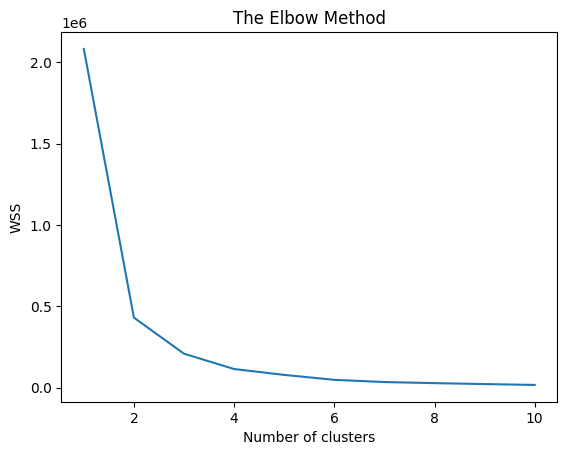

In [1761]:
from sklearn.cluster import KMeans
wss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,random_state=0)
    kmeans.fit(cc)
    wss.append(kmeans.inertia_)
plt.plot(range(1, 11), wss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

In [1762]:
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(cc)
labels = kmeans.labels_
centroids_bowling = kmeans.cluster_centers_

In [1763]:
silhouette_score(cc,labels)

0.6833321968559233

In [1764]:
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
}


silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(cc)
    score = silhouette_score(cc,kmeans.labels_)
    silhouette_coefficients.append(score)

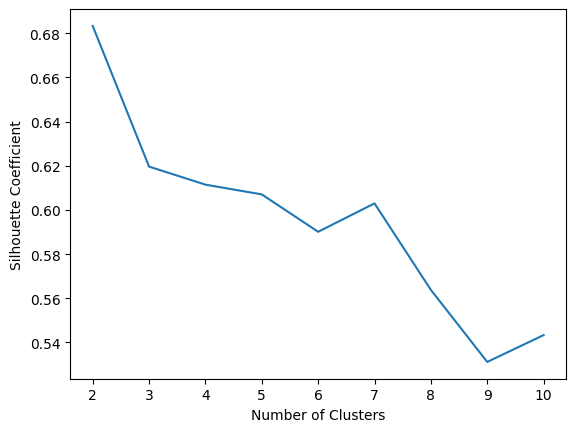

In [1765]:
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [1766]:
df4['cluster']=labels
df4.head()

PLAYER  TEAM  OVERS  RUNS  WICKETS      ECON  cluster
0  Jhye Richardson     5   61.3   463       29  7.528455        0
1    Ben Dwarshuis     6   45.3   403       24  8.857143        0
2    Mark Steketee     1   56.2   522       24  9.266327        0
3         Wes Agar     0   54.4   457       22  8.359705        0
4   Tanveer Sangha     7   47.3   394       21  8.294737        0

In [1767]:
df4.cluster.value_counts().sort_index()

0    40
1    62
Name: cluster, dtype: int64

In [1768]:
df4.head()

PLAYER  TEAM  OVERS  RUNS  WICKETS      ECON  cluster
0  Jhye Richardson     5   61.3   463       29  7.528455        0
1    Ben Dwarshuis     6   45.3   403       24  8.857143        0
2    Mark Steketee     1   56.2   522       24  9.266327        0
3         Wes Agar     0   54.4   457       22  8.359705        0
4   Tanveer Sangha     7   47.3   394       21  8.294737        0

In [1769]:
df4['cluster'] = df4['cluster'].replace({0: 'Grade A', 1: 'Grade B'})

In [1770]:
Grade_A = df4[df4['cluster'] == 'Grade A']
Grade_A.head()

PLAYER  TEAM  OVERS  RUNS  WICKETS      ECON  cluster
0  Jhye Richardson     5   61.3   463       29  7.528455  Grade A
1    Ben Dwarshuis     6   45.3   403       24  8.857143  Grade A
2    Mark Steketee     1   56.2   522       24  9.266327  Grade A
3         Wes Agar     0   54.4   457       22  8.359705  Grade A
4   Tanveer Sangha     7   47.3   394       21  8.294737  Grade A

In [1771]:
Grade_B = df4[df4['cluster'] == 'Grade B']
Grade_B.head()

PLAYER  TEAM  OVERS  RUNS  WICKETS      ECON  cluster
20     Mujeeb Ur Rahman     1   30.0   188       14  6.266667  Grade B
26  Nathan Coulter-Nile     4   21.5   172       11  7.877983  Grade B
29            Zak Evans     3   15.0   146       10  9.733333  Grade B
30   Marnus Labuschagne     1   17.0   146       10  8.588235  Grade B
34      Brendan Doggett     7   18.1   120        9  6.629834  Grade B

In [1772]:
df4_subset = df4.iloc[:,2:6].copy()
df4_subset['cluster'] = df4['cluster']

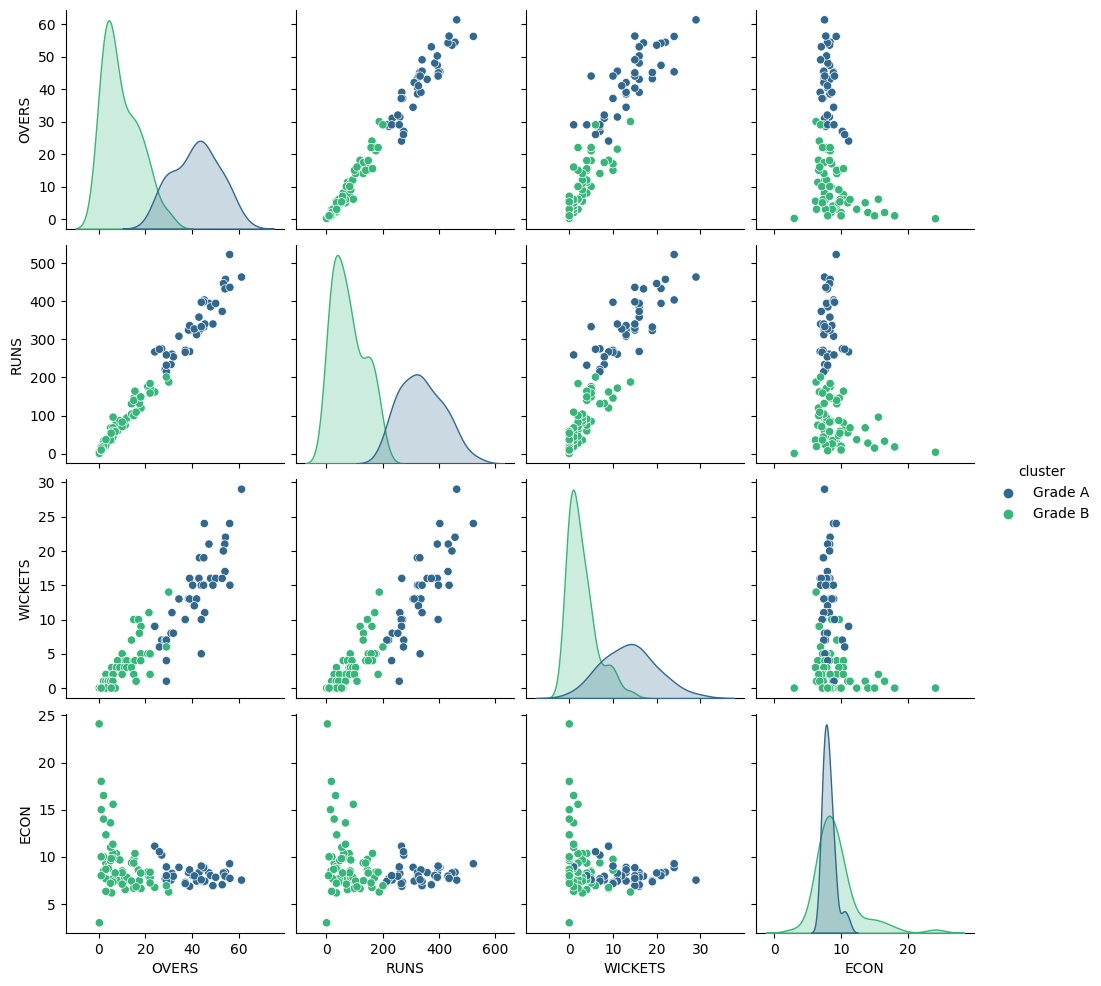

In [1773]:
sns.pairplot(df4_subset, hue='cluster', palette='viridis')
plt.show()

## HIERARCHICAL CLUSTERING

In [1774]:
cc = df_h4.iloc[:,2:6]
cc.head()


OVERS  RUNS  WICKETS      ECON
0   61.3   463       29  7.528455
1   45.3   403       24  8.857143
2   56.2   522       24  9.266327
3   54.4   457       22  8.359705
4   47.3   394       21  8.294737

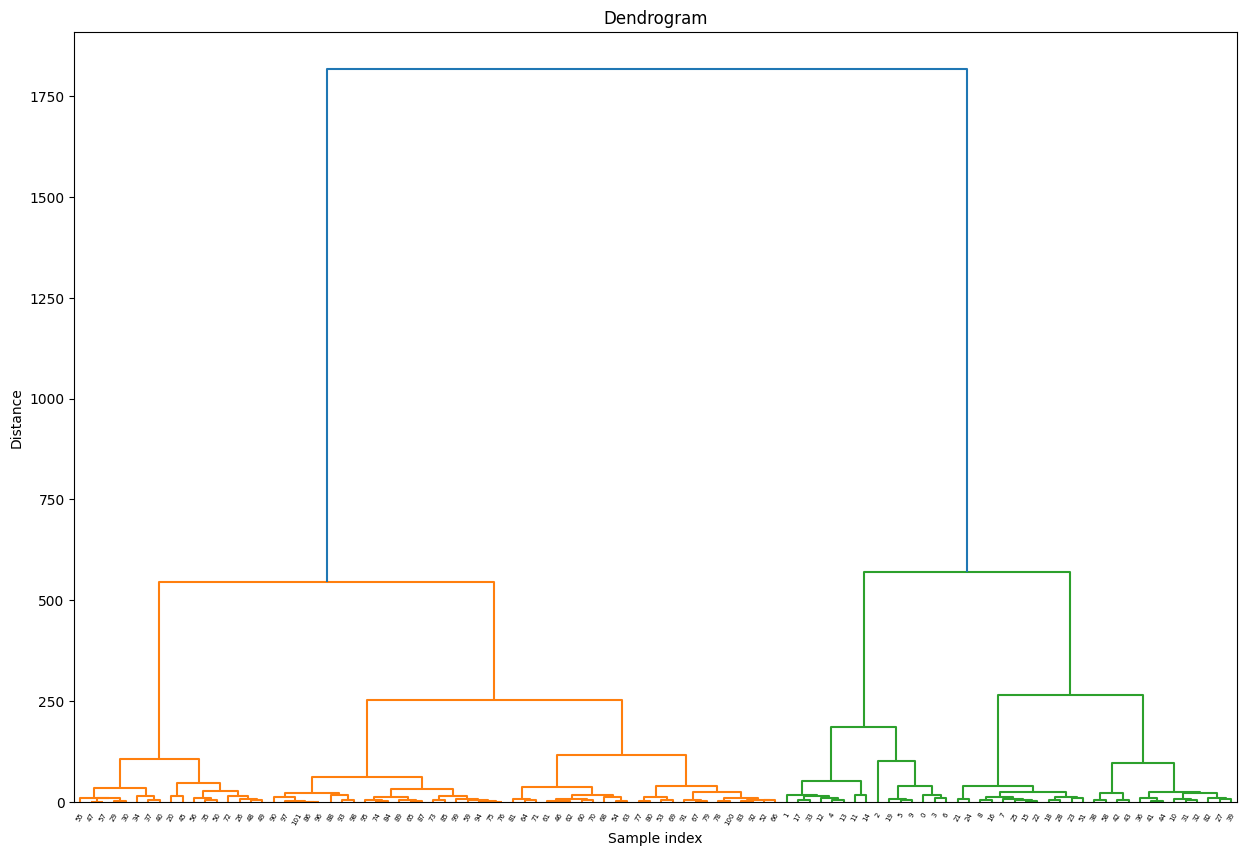

In [1775]:
linkage_matrix = linkage(cc, method='ward')
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.xticks(rotation=60)
plt.show()

In [1776]:
num_clusters = 2

model = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
clusters = model.fit_predict(cc)

silhouette_avg = silhouette_score(cc, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')


Silhouette Score: 0.68


In [1777]:
df_h4['Cluster'] = clusters
df_h4.head()

PLAYER  TEAM  OVERS  RUNS  WICKETS      ECON  Cluster
0  Jhye Richardson     5   61.3   463       29  7.528455        0
1    Ben Dwarshuis     6   45.3   403       24  8.857143        0
2    Mark Steketee     1   56.2   522       24  9.266327        0
3         Wes Agar     0   54.4   457       22  8.359705        0
4   Tanveer Sangha     7   47.3   394       21  8.294737        0

In [1778]:
df_h4.head(10)

PLAYER  TEAM  OVERS  RUNS  WICKETS      ECON  Cluster
0  Jhye Richardson     5   61.3   463       29  7.528455        0
1    Ben Dwarshuis     6   45.3   403       24  8.857143        0
2    Mark Steketee     1   56.2   522       24  9.266327        0
3         Wes Agar     0   54.4   457       22  8.359705        0
4   Tanveer Sangha     7   47.3   394       21  8.294737        0
5       Andrew Tye     5   54.1   433       21  7.993945        0
6     Nathan Ellis     2   53.5   446       20  8.284881        0
7     Peter Siddle     0   43.2   323       19  7.453903        0
8       Adam Zampa     4   45.1   332       19  7.350662        0
9     Scott Boland     2   54.2   432       17  7.950969        0

In [1779]:
df_h4.Cluster.value_counts().sort_index()


0    40
1    62
Name: Cluster, dtype: int64

In [1780]:
df_h4['Cluster'] = df_h4['Cluster'].replace({0: 'Grade A', 1: 'Grade B'})

In [1782]:
Grade_A = df_h4[df_h4['Cluster'] == 'Grade A']
Grade_A.head(10)

PLAYER  TEAM  OVERS  RUNS  WICKETS      ECON  Cluster
0  Jhye Richardson     5   61.3   463       29  7.528455  Grade A
1    Ben Dwarshuis     6   45.3   403       24  8.857143  Grade A
2    Mark Steketee     1   56.2   522       24  9.266327  Grade A
3         Wes Agar     0   54.4   457       22  8.359705  Grade A
4   Tanveer Sangha     7   47.3   394       21  8.294737  Grade A
5       Andrew Tye     5   54.1   433       21  7.993945  Grade A
6     Nathan Ellis     2   53.5   446       20  8.284881  Grade A
7     Peter Siddle     0   43.2   323       19  7.453903  Grade A
8       Adam Zampa     4   45.1   332       19  7.350662  Grade A
9     Scott Boland     2   54.2   432       17  7.950969  Grade A

In [1783]:
Grade_B = df_h4[df_h4['Cluster'] == 'Grade B']
Grade_B.head(10)

PLAYER  TEAM  OVERS  RUNS  WICKETS      ECON  Cluster
20     Mujeeb Ur Rahman     1   30.0   188       14  6.266667  Grade B
26  Nathan Coulter-Nile     4   21.5   172       11  7.877983  Grade B
29            Zak Evans     3   15.0   146       10  9.733333  Grade B
30   Marnus Labuschagne     1   17.0   146       10  8.588235  Grade B
34      Brendan Doggett     7   18.1   120        9  6.629834  Grade B
35     Mitchell Swepson     1   24.0   162        9  6.750000  Grade B
37       James Faulkner     2   17.4   132        8  7.471557  Grade B
40          Sean Abbott     6   14.0   131        7  9.357143  Grade B
45           Zahir Khan     4   29.0   201        6  6.931034  Grade B
46     Liam Livingstone     5   10.0    85        5  8.500000  Grade B

In [1787]:
df4_subset = df_h4.iloc[:, 2:9].copy()
df4_subset['Cluster'] = df_h4['Cluster']

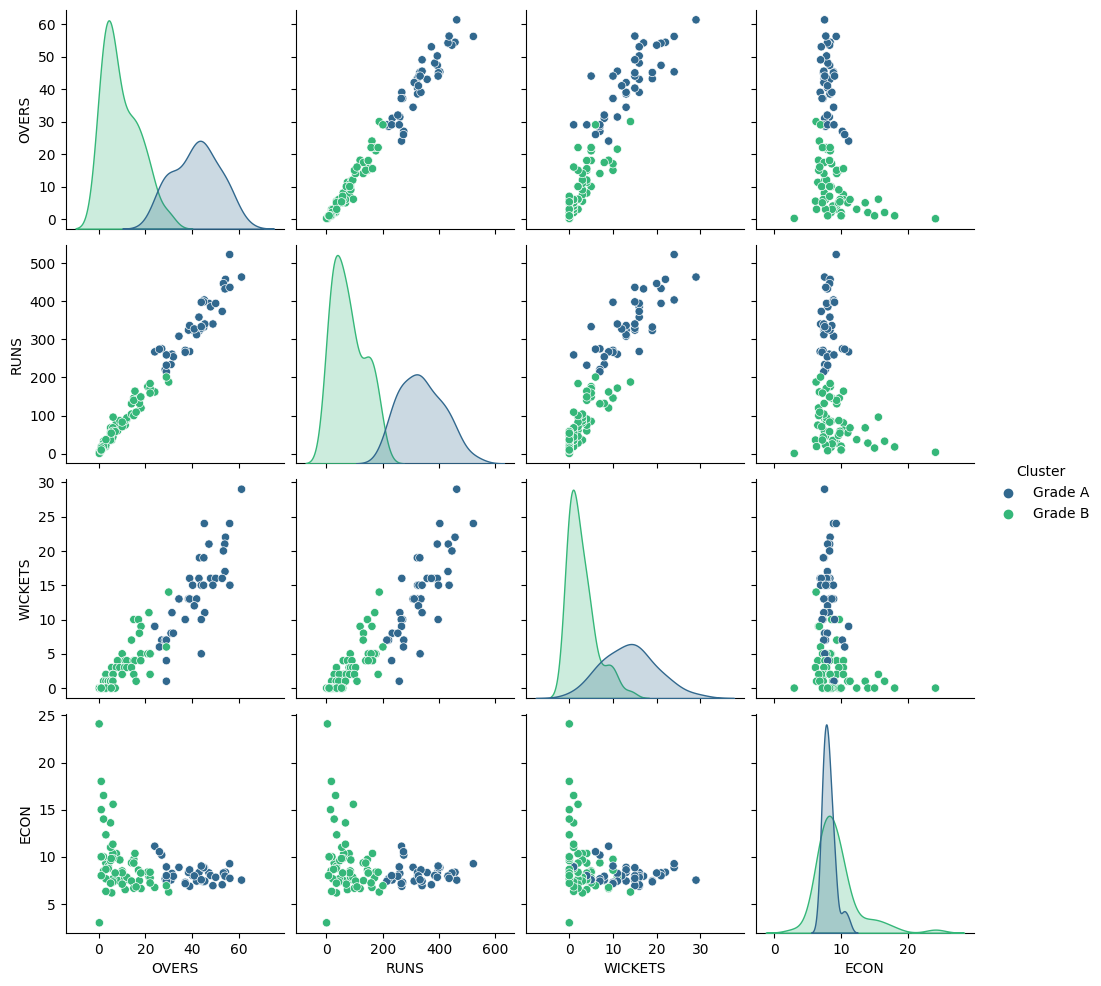

In [1788]:
sns.pairplot(df4_subset, hue='Cluster', palette='viridis')
plt.show()


## DB SCAN CLUSTERING

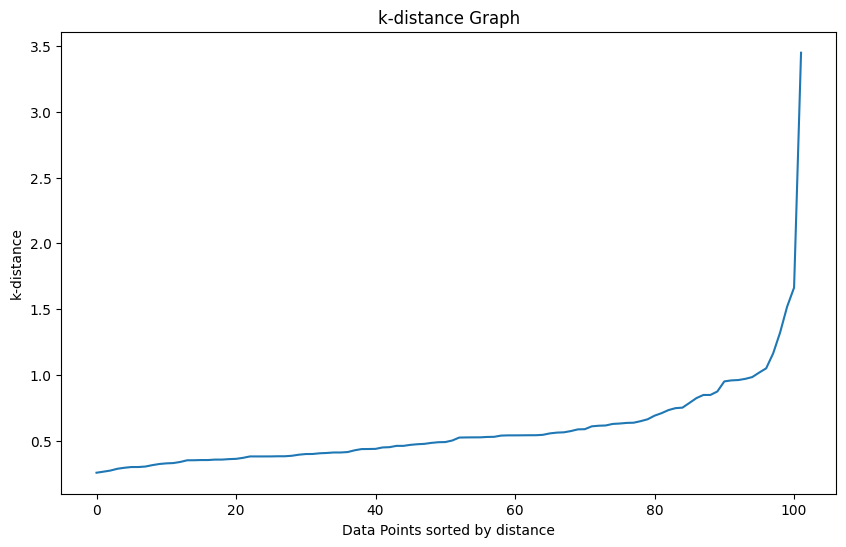

In [1819]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(df_db4.iloc[:,2:9])

min_samples = 5


neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X_train_scaled)

distances, indices = neighbors_fit.kneighbors(X_train_scaled)
distances = np.sort(distances[:, min_samples-1], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Data Points sorted by distance')
plt.ylabel('k-distance')
plt.title('k-distance Graph')
plt.show()

Estimated number of clusters: 1
Estimated number of noise points: 3
Silhouette Score: 0.49


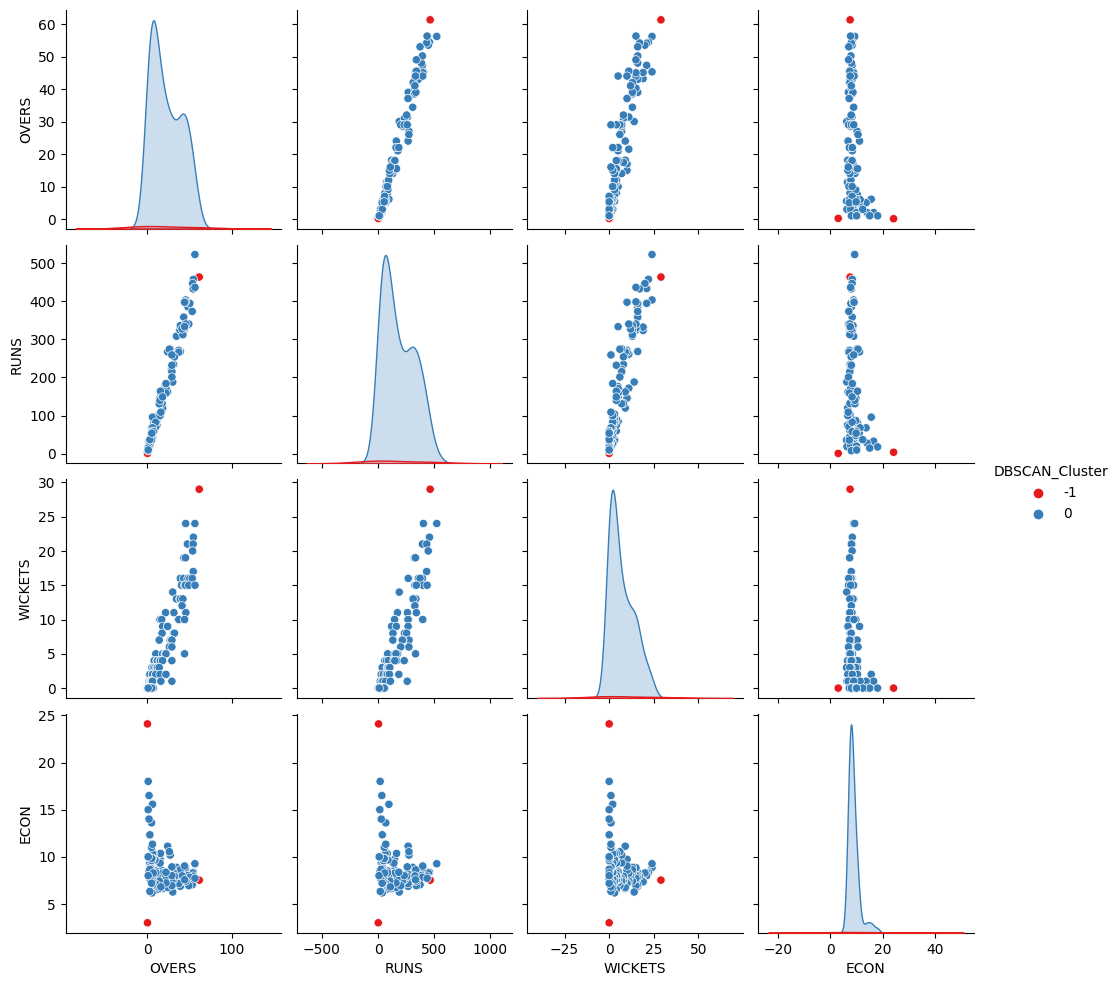

In [1826]:
epsilon = 1


dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
train_labels = dbscan.fit_predict(X_train_scaled)


n_clusters = len(set(train_labels)) - (1 if -1 in train_labels else 0)
n_noise = list(train_labels).count(-1)

print(f'Estimated number of clusters: {n_clusters}')
print(f'Estimated number of noise points: {n_noise}')

cc['DBSCAN_Cluster'] = dbscan.labels_

if len(set(dbscan.labels_)) > 1:
    silhouette_avg = silhouette_score(X_train_scaled, dbscan.labels_)
    print(f'Silhouette Score: {silhouette_avg:.2f}')
else:
    print("DBSCAN did not find more than one cluster.")
    
sns.pairplot(cc, hue='DBSCAN_Cluster', palette='Set1')
plt.show()